In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy.signal import spectrogram
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D, MaxPool1D, GlobalAvgPool1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from tensorflow.keras import regularizers
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [96]:
INPUT_PATH = "Data/"
SAMPLE_RATE = 22050

In [97]:
set_a_normal_audios = pd.read_csv(INPUT_PATH + 'Set A/Atraining_normal_seg.csv')
set_b_normal_audios = pd.read_csv(INPUT_PATH + 'Set B/Btraining_normal_seg.csv')
set_a_normal_audios.head(5)

,Unnamed: 0,S1,S2,S1.1,S2.1,S1.2,S2.2,S1.3,S2.3,S1.4,...,S2.14,S1.15,S2.15,S1.16,S2.16,S1.17,S2.17,S1.18,S2.18,Unnamed: 39
0,201102081321.aif,10021.0,20759,35075,47244,62992,73729,88761,101646,115246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201102260502.aif,NaN,11526,27941,42197,58163,71278,88955,102641,122028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201103090635.aif,5366.0,17632,31432,44464,59030,71296,86629,99661,116527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201103140132.aif,16358.0,29272,89539,105036,128282,142057,170469,183383,207490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201103140822.aif,3444.0,18080,44770,58545,84374,98149,123977,134309,157555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


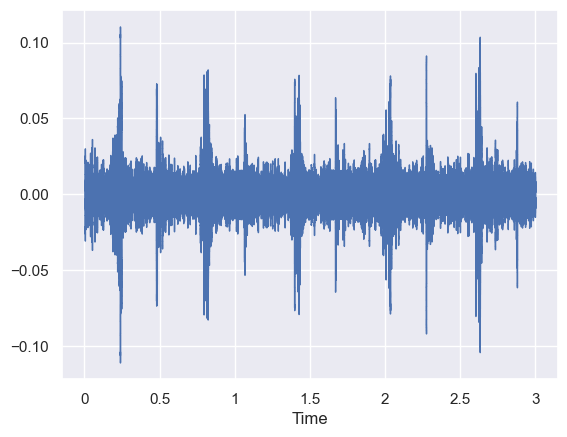

In [98]:
#loading and visualizing a sample wave

sampledata, sampling_rate = librosa.load(INPUT_PATH + 'Set A/audio_files/normal__201102081321.wav', duration=3)
librosa.display.waveshow(sampledata, sr=sampling_rate)

In [99]:
# loading all the metadata for set A and B

set_a_metadata = pd.read_csv(INPUT_PATH + 'Set A/set_a.csv').drop('sublabel', axis = 1).dropna()
set_b_metadata = pd.read_csv(INPUT_PATH + 'Set B/set_b.csv').drop('sublabel', axis = 1).dropna()

In [100]:
set_a_metadata

,dataset,fname,label
0,a,set_a/artifact__201012172012.wav,artifact
1,a,set_a/artifact__201105040918.wav,artifact
2,a,set_a/artifact__201105041959.wav,artifact
3,a,set_a/artifact__201105051017.wav,artifact
4,a,set_a/artifact__201105060108.wav,artifact
...,...,...,...
119,a,set_a/normal__201106221450.wav,normal
120,a,set_a/normal__201108011112.wav,normal
121,a,set_a/normal__201108011114.wav,normal
122,a,set_a/normal__201108011115.wav,normal


In [101]:
# checking class label for set A
set_a_metadata['label'].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [102]:
# checking class label for set B
set_b_metadata['label'].value_counts()

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

In [104]:
# merging both the sets together
total_train_metadata = pd.concat([set_a_metadata, set_b_metadata], ignore_index=True)

In [105]:
# some important functions to generate features

def load_audio_timeseries(fileName, setName, offset=0, duration=None):
    if setName == 'a' :
        y, sr = librosa.load(INPUT_PATH + "Set A/audio_files/" + fileName, sr=SAMPLE_RATE, offset=offset, duration=duration)
    elif setName == 'b' :
        y, sr = librosa.load(INPUT_PATH + "Set B/audio_files/" + fileName, sr=SAMPLE_RATE, offset=offset, duration=duration)
    else:
        sys.exit('Please enter a valid Set')        
    return(y)

In [106]:
# generating required features

total_train_metadata['fname'] = total_train_metadata['fname'].apply(lambda f:f.split('/')[1])
total_train_metadata['fname'] =  [re.sub(r'Btraining_','', str(x)) for x in total_train_metadata['fname']]
total_train_metadata['time_series'] = total_train_metadata.apply(lambda row: load_audio_timeseries(row['fname'], row['dataset']), axis=1)
total_train_metadata['audio_duration'] = round(total_train_metadata['time_series'].apply(len) / SAMPLE_RATE, 1)


<AxesSubplot:ylabel='fname'>

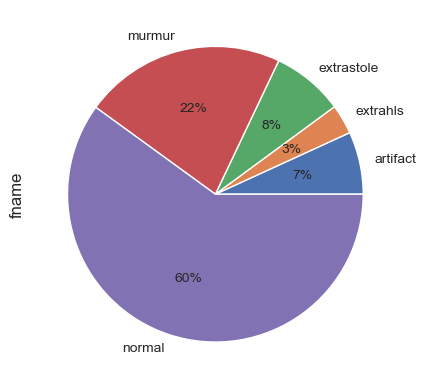

In [110]:
# plotting the pie chart to represent the class distribution across the training data

total_train_metadata.groupby('label')["fname"].count().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})

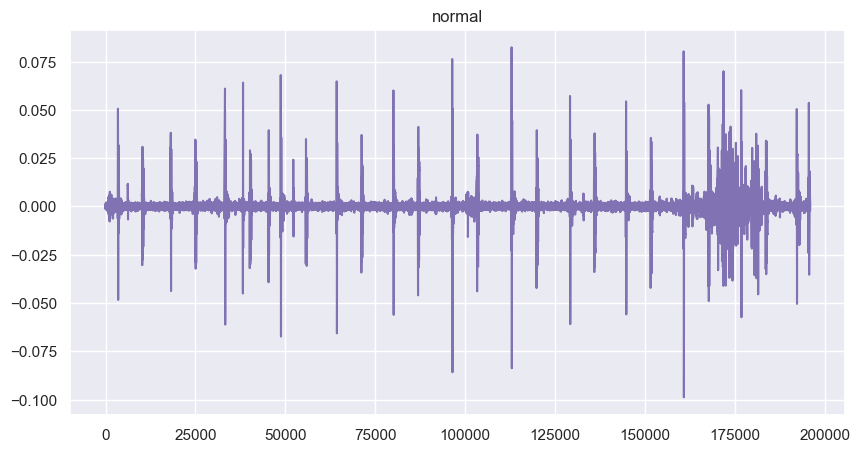

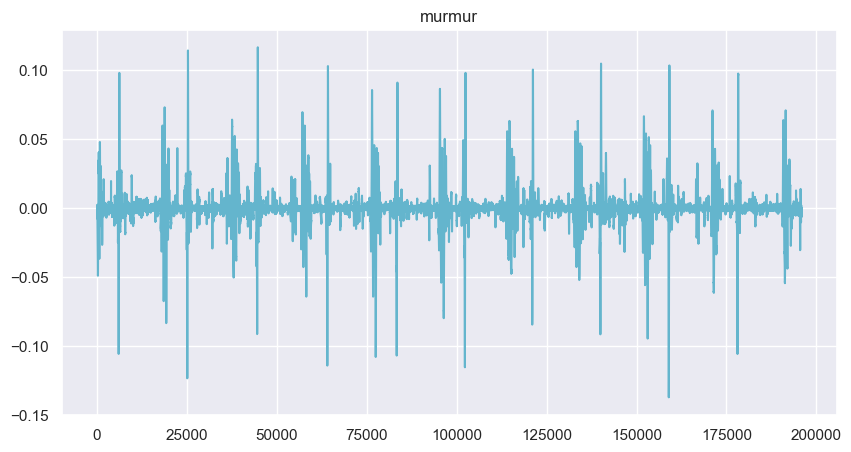

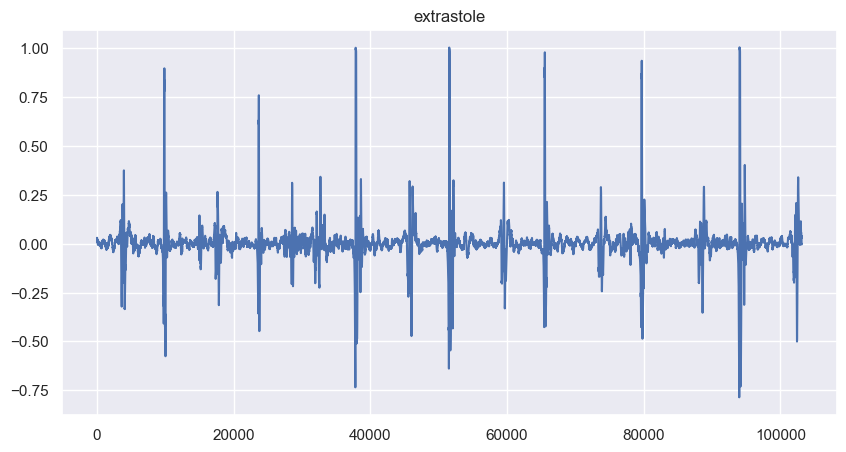

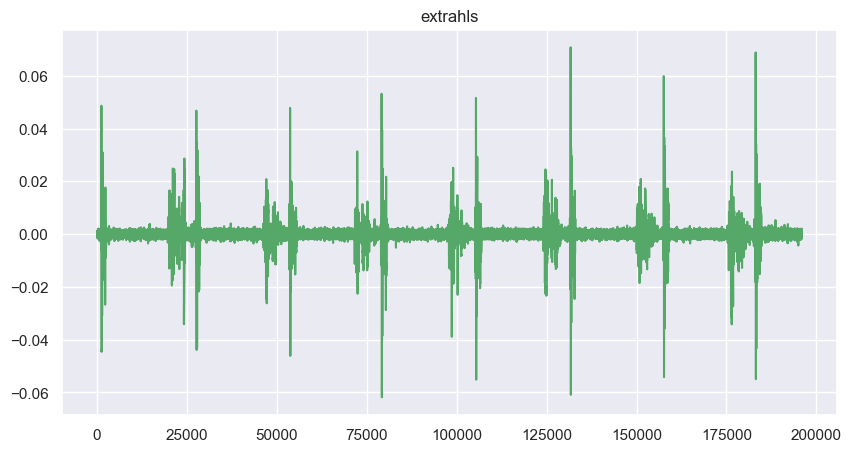

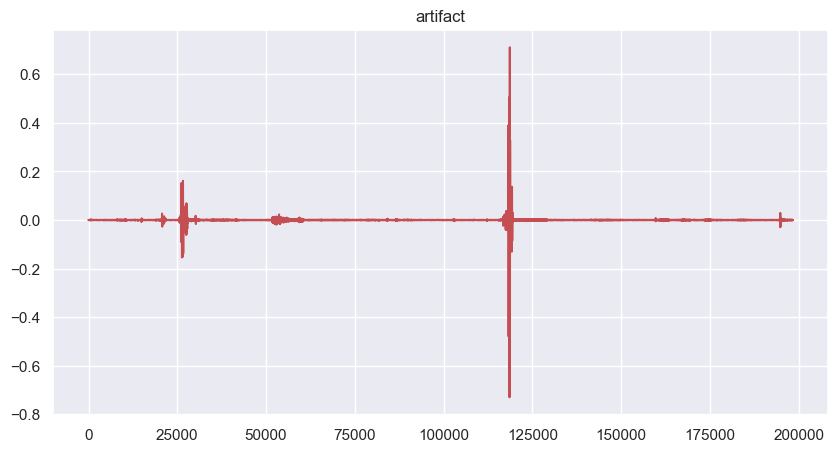

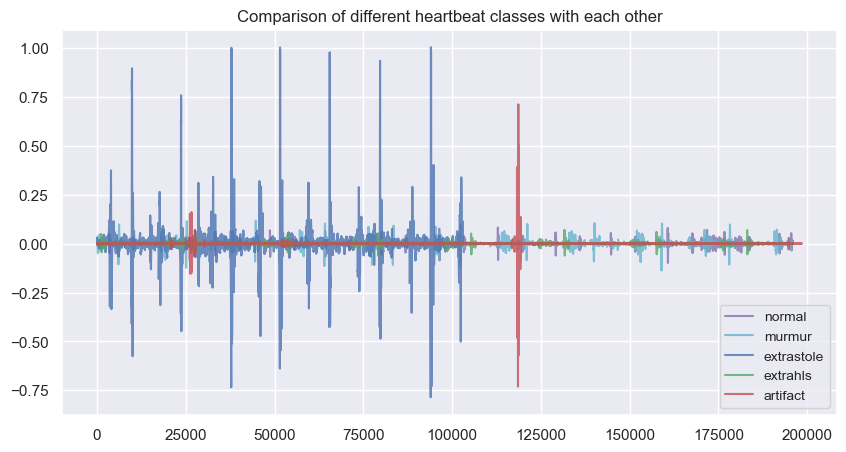

In [111]:
# plotting the different types of wave in order to find out the distinguishing features

normal = total_train_metadata.loc[total_train_metadata['label'] == 'normal'].head(1)
murmur = total_train_metadata.loc[total_train_metadata['label'] == 'murmur'].head(1)
extrastole = total_train_metadata.loc[total_train_metadata['label'] == 'extrastole'].head(1)
extrahls = total_train_metadata.loc[total_train_metadata['label'] == 'extrahls'].head(1)
artifact = total_train_metadata.loc[total_train_metadata['label'] == 'artifact'].head(1)

plt.figure(1, figsize=(10,5))
plt.title('normal', fontsize=12)
plt.plot(normal['time_series'].values[0], c='m')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.figure(2, figsize=(10, 5))
plt.title('murmur',  fontsize=12)
plt.plot(murmur['time_series'].values[0], c='c')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.figure(3, figsize=(10, 5))
plt.title('extrastole',  fontsize=12)
plt.plot(extrastole['time_series'].values[0], c='b')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.figure(4, figsize=(10, 5))
plt.title('extrahls',  fontsize=12)
plt.plot(extrahls['time_series'].values[0], c='g')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.figure(5, figsize=(10, 5))
plt.title('artifact',  fontsize=12)
plt.plot(artifact['time_series'].values[0], c='r')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.figure(6, figsize=(10, 5))
plt.plot(normal['time_series'].values[0], c='m', label='normal', alpha=0.8)
plt.plot(murmur['time_series'].values[0], c='c', label='murmur', alpha=0.8)
plt.plot(extrastole['time_series'].values[0], c='b', label='extrastole', alpha=0.8)
plt.plot(extrahls['time_series'].values[0], c='g', label='extrahls', alpha=0.8)
plt.plot(artifact['time_series'].values[0], c='r', label='artifact', alpha=0.8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.title('Comparison of different heartbeat classes with each other',  fontsize=12)
plt.legend(loc='lower right',  fontsize=10)

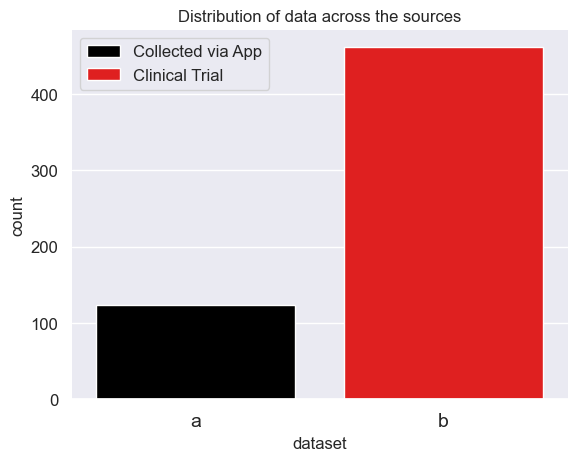

In [112]:
# plotting the data to find the data source distribution

fig,ax = plt.subplots()
sns.set(font_scale=1.3)
color = ['black','red','green','orange','blue','limegreen','darkgreen','royalblue','navy']
sns.countplot(x='dataset',hue='dataset',data=total_train_metadata,dodge=False, palette=color)
plt.title('Distribution of data across the sources', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(left=False)
sns.despine(left=True)

plt.legend(loc='upper left', labels=['Collected via App','Clinical Trial'], fontsize=12)
plt.show()

In [114]:
# summary statistics for audio duration across each class of heartbeat

total_train_metadata.groupby(total_train_metadata['label']).describe()['audio_duration']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
artifact,40.0,9.000000,0.000000,9.0,9.00,9.00,9.000,9.0
extrahls,19.0,6.868421,2.822145,0.9,6.10,8.00,9.000,9.0
extrastole,46.0,5.856522,3.123648,1.9,3.60,5.15,7.675,13.4
murmur,129.0,7.765116,4.092670,0.9,4.60,7.90,9.200,24.2
normal,351.0,6.316524,4.346994,0.8,2.85,5.10,9.000,27.9


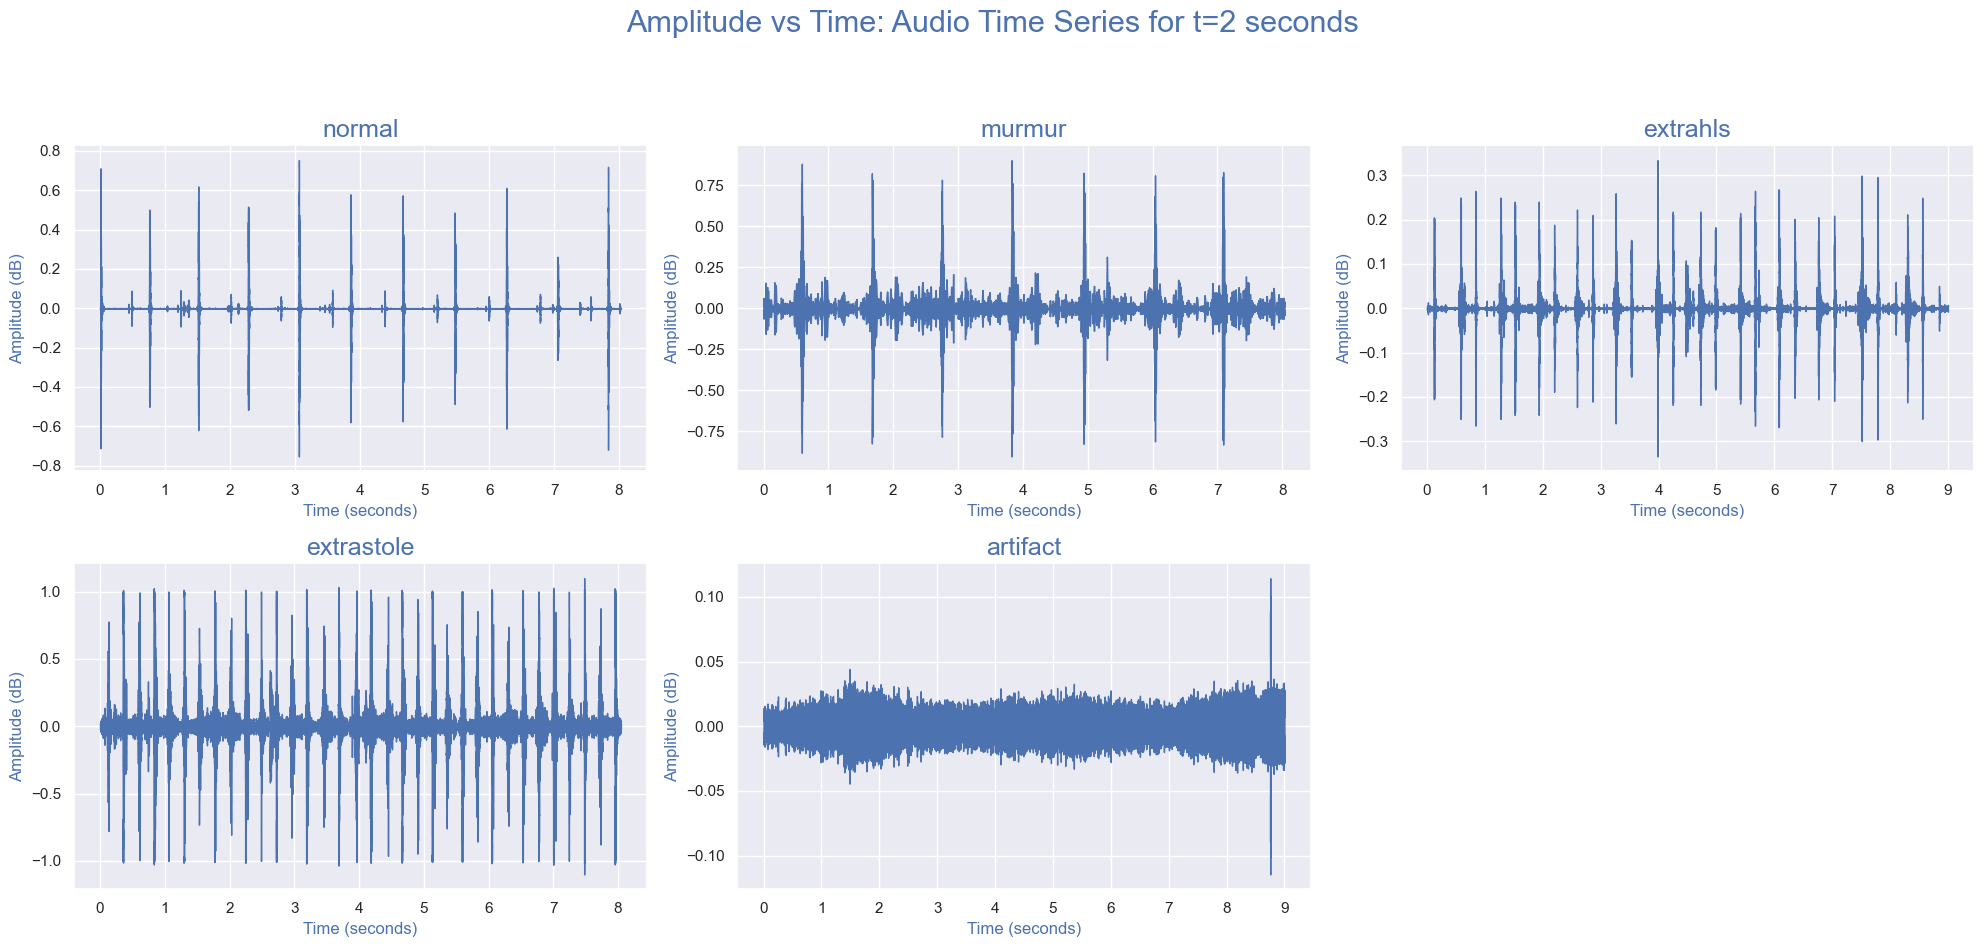

In [115]:
# oscillogram plots for all types of classes

samples = ['normal__201103170121.wav', 'murmur__201101180902.wav', 'extrahls__201101241423.wav',
            'extrastole_235_1308749032454_B.wav', 'artifact__201106171003.wav']

sns.set(font_scale=1)

with plt.rc_context():
    plt.figure(figsize=(20,9), facecolor='None')
    plt.subplots_adjust(bottom=0.1e-5)
    plt.suptitle("Amplitude vs Time for different classes",x=0.5,y=1.05,fontsize=22, color='b')
    for i, f in enumerate(samples, 1):
        if i < 6:
            y, sr = librosa.load(INPUT_PATH + "oscillogramPlots/" + f, SAMPLE_RATE)
            plt.subplot(2, 3, i)
            librosa.display.waveshow(y, sr=SAMPLE_RATE)
            plt.title(f.split("_")[0], fontsize=16, color='b')
            plt.xlabel('Time', fontsize=11, color='blue')
            plt.ylabel('Amplitude', fontsize=11, color='blue')
    plt.tight_layout()

Text(0.5, 0, 'time')

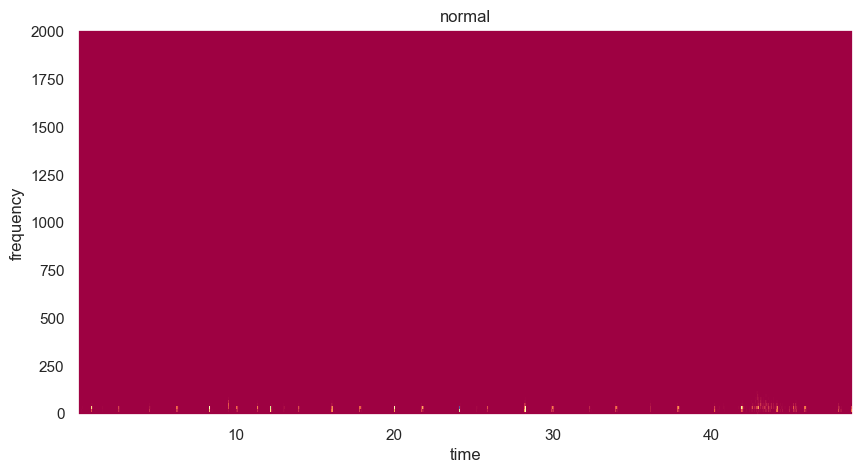

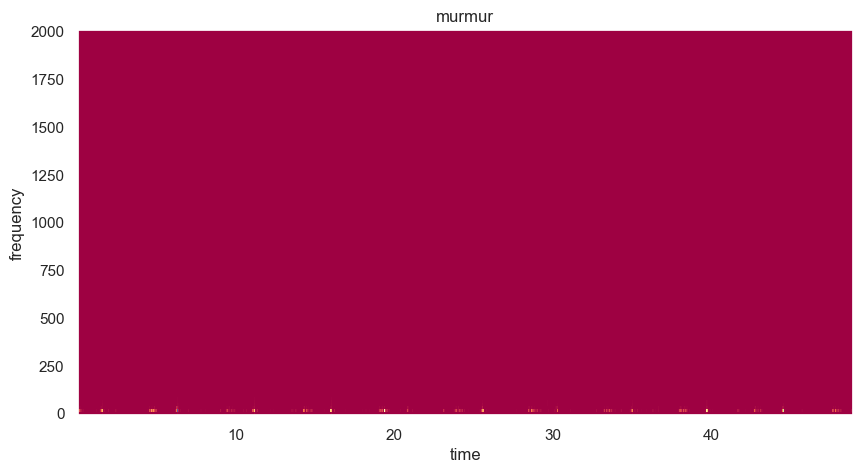

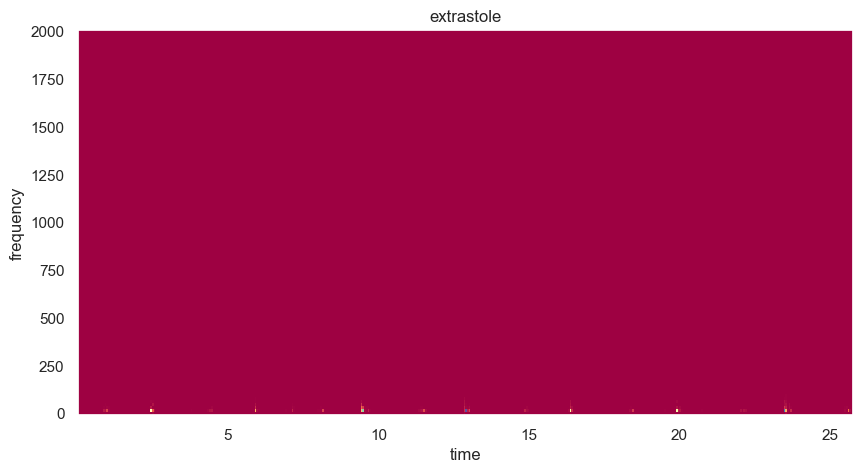

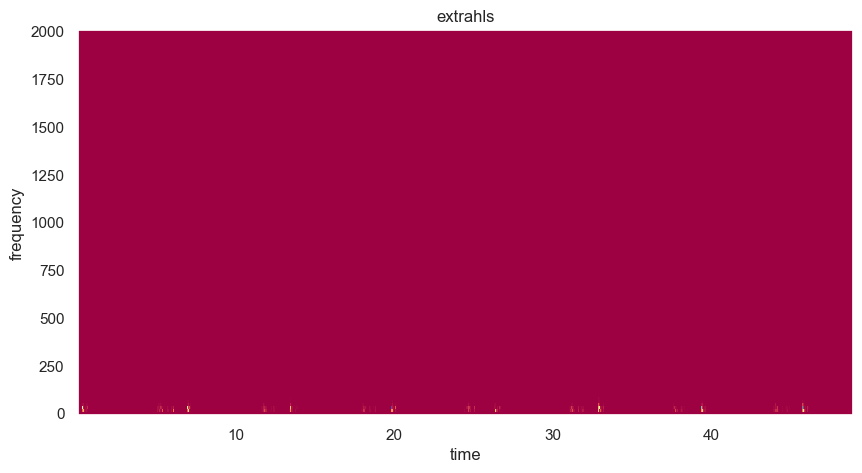

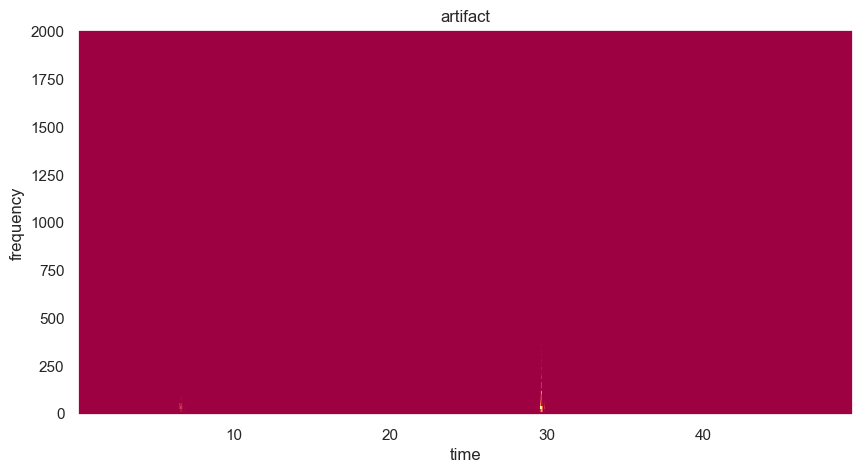

In [118]:
# spectograms for all types of classes - couldn't see any significant spectograms

plt.figure(1, figsize=(10,5))
f_normal, t_normal, s_normal = spectrogram(normal['time_series'].values[0], 4000)
plt.title('normal')
plt.pcolormesh(t_normal, f_normal, s_normal, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(2, figsize=(10, 5))
f_murmur, t_murmur, s_murmur = spectrogram(murmur['time_series'].values[0], 4000)
plt.title('murmur')
plt.pcolormesh(t_murmur, f_murmur, s_murmur, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(3, figsize=(10, 5))
f_extrastole, t_extrastole, s_extrastole = spectrogram(extrastole['time_series'].values[0], 4000)
plt.title('extrastole')
plt.pcolormesh(t_extrastole, f_extrastole, s_extrastole, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(4, figsize=(10, 5))
f_extrahls, t_extrahls, s_extrahls = spectrogram(extrahls['time_series'].values[0], 4000)
plt.title('extrahls')
plt.pcolormesh(t_extrahls, f_extrahls, s_extrahls, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(5, figsize=(10, 5))
f_artifact, t_artifact, s_artifact = spectrogram(artifact['time_series'].values[0], 4000)
plt.title('artifact')
plt.pcolormesh(t_artifact, f_artifact, s_artifact, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

<AxesSubplot:ylabel='audio_duration'>

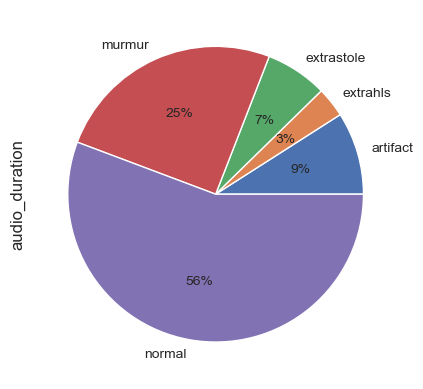

In [141]:
# talking about the class imbalance we can clearly see it through the below pie

total_train_metadata.groupby('label')["audio_duration"].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})


## Feature Engineering

In [10]:
# some important functions for feature engineering

def loading_audio_files_increasing_data(filename, set_name):
    
    if set_name == 'a' :
        data,sr = librosa.load(INPUT_PATH + "Set A/audio_files/" + filename, sr=SAMPLE_RATE, offset=0, duration = 3.0)
    elif set_name == 'b' :
        data,sr = librosa.load(INPUT_PATH + "Set B/audio_files/" + filename, sr=SAMPLE_RATE, offset=0, duration = 3.0)
    
    output1 = getting_audio_function(data)
    result = np.array(output1)
    
    noise_output = noise_generation_function(data)
    output2 = getting_audio_function(noise_output)
    result = np.vstack((result,output2))
    
    stretch_output = stretch_generation_function(data)
    stretch_pitch = pitch_generation_function(stretch_output,SAMPLE_RATE)
    output3 = getting_audio_function(stretch_pitch)
    result = np.vstack((result,output3))
    
        
    return result

In [11]:
def getting_audio_function(data):
    
    output_result = np.array([])
    
    mean_zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero_crossing_rate))
    
    stft_output = np.abs(librosa.stft(data))
    chroma_mean = np.mean(librosa.feature.chroma_stft(S=stft_output,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,chroma_mean))
    
    mfcc_output = np.mean(librosa.feature.mfcc(y=data,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,mfcc_output))
    
    root_output = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_output))
    
    mel_output = np.mean(librosa.feature.melspectrogram(y=data,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,mel_output))
    
    return output_result

In [12]:
def noise_generation_function(data):
    noise_value = 0.009 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    return data

def stretch_generation_function(data,rate=0.6):
    return librosa.effects.time_stretch(data,rate)

def shift_generation_function(data):
    shift_range = int(np.random.uniform(-3,3) * 1000)
    return np.roll(data,shift_range)

def pitch_generation_function(data,SAMPLE_RATE,pitch_factor=0.3):
    return librosa.effects.pitch_shift(data,SAMPLE_RATE,pitch_factor)

In [13]:
def y_bin(x):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] != 4:
            y[i] = 1
    return y

In [14]:
def bin_cf_matrix(bin_prob,bin_y):
    y_pred = np.zeros(bin_prob.shape[0])
    for i in range(bin_prob.shape[0]):
        if bin_prob[i,0] > bin_prob[i,1]:
            y_pred[i] = 0
        else:
            y_pred[i] = 1
        
    return confusion_matrix(bin_y,y_pred)

In [15]:
def bin_prob(x):
    y = np.zeros((x.shape[0],2))
    for i in range(x.shape[0]):
        y[i,1] = np.sum(x[i,:-1])
        y[i,0] = x[i,-1]
    return y

In [16]:
def bin_accuracy_score(x):
    return (x[0,0]+x[1,1])/np.sum(x)

In [157]:
def bin_f1_score(cf):
    precision = cf[1,1]/(cf[1,1]+cf[0,1])
    recall = cf[1,1]/(cf[1,1]+cf[1,0])
    f1_score = (2*precision*recall)/(precision+recall)
    return precision,recall,f1_score

In [18]:
def y_bin_cnn(x):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if x[i,-1] != 1:
            y[i] = 1
    return y

In [19]:
x = []
y = []
    
for index, row in total_train_metadata.iterrows(): 
        wav_features = loading_audio_files_increasing_data(row['fname'],row['dataset']) 
        print(index)
        for indexing in wav_features:
            x.append(indexing)
            y.append(row['label'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [20]:
print(len(y))
print(len(x))

1755
1755


### Understanding new features in data generated above

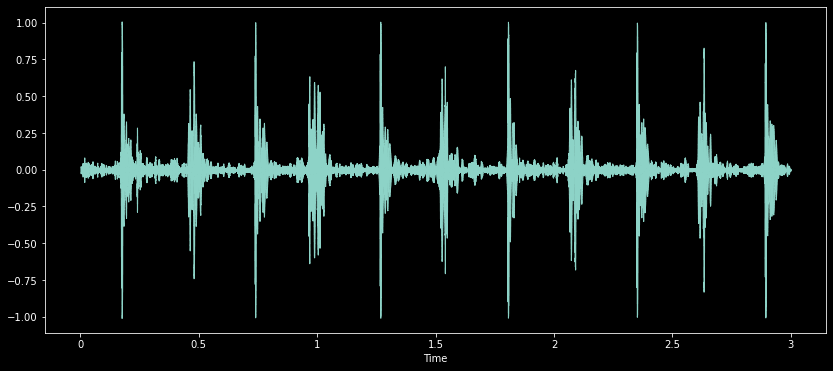

In [214]:
# plain simple audio

waveplot_function(total_train_metadata["time_series"][77])

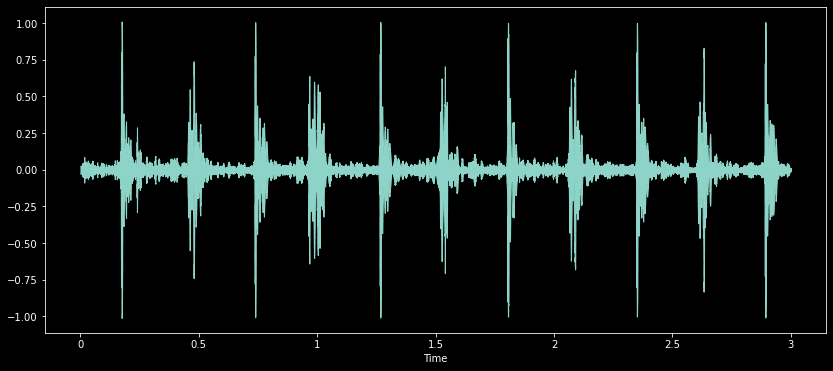

In [233]:
# audio with added noise

figure = plt.figure(figsize=(14,6))
data,sample_rate = librosa.load(total_train_metadata["time_series"][77],duration=3.0)
noise_value = 0.02 * np.random.uniform() * np.amax(data)
data = data + noise_value * np.random.normal(size=data.shape[0])
librosa.display.waveshow(data,sr=SAMPLE_RATE)

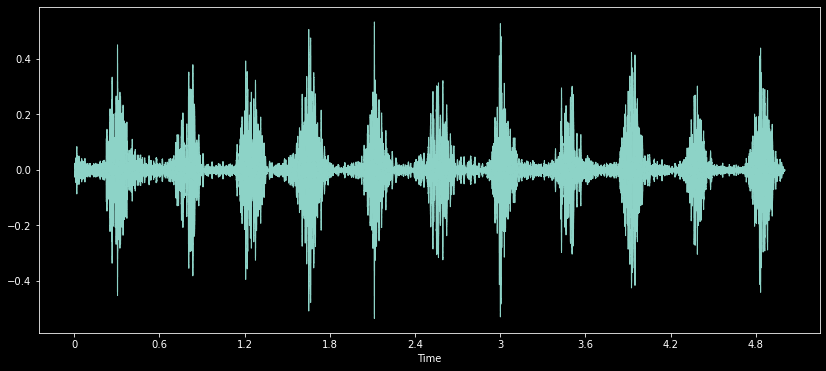

In [216]:
# audio with added noise and stretch, we can see the audio becomes distorted

figure = plt.figure(figsize=(14,6))
data,sample_rate = librosa.load(total_train_metadata["time_series"][77],duration=3.0)
data = pitch_generation_function(stretch_generation_function(data), SAMPLE_RATE)
librosa.display.waveshow(data,sr=SAMPLE_RATE)

### Encoding + Transforming for CNN 

**Using One hot encoding for CNN**

In [21]:
train_df = pd.DataFrame(x)
train_df["category"] = y

train_df.to_csv("train_df.csv",index=False)
train_df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,category
0,0.295560,0.852873,0.838950,0.834593,0.821389,0.802865,0.830613,0.831956,0.821826,0.820797,...,6.339760e-06,6.157197e-06,5.179905e-06,4.170940e-06,3.449631e-06,1.711350e-06,4.898178e-07,3.516280e-08,6.550905e-10,artifact
1,0.305337,0.856830,0.843640,0.842301,0.832050,0.828738,0.850440,0.833172,0.820838,0.819945,...,6.511747e-06,6.250298e-06,5.365454e-06,4.372898e-06,3.606819e-06,1.853301e-06,6.709224e-07,2.125041e-07,1.697028e-07,artifact
2,0.196002,0.823269,0.788673,0.788165,0.781116,0.730224,0.745253,0.816232,0.818829,0.786038,...,1.463455e-06,1.387859e-06,1.154852e-06,1.087811e-06,8.620453e-07,4.542333e-07,7.111442e-08,2.439340e-09,6.776637e-12,artifact
3,0.718994,0.892986,0.954618,0.986035,0.849398,0.512615,0.444453,0.495428,0.558138,0.628506,...,8.471386e-09,8.750909e-09,9.195876e-09,8.476155e-09,7.996912e-09,5.301486e-09,1.534767e-09,1.414345e-10,2.484462e-12,artifact
4,0.719434,0.918529,0.975268,0.970175,0.717352,0.451699,0.462163,0.514704,0.585353,0.650441,...,8.472556e-09,8.750251e-09,9.189797e-09,8.475043e-09,7.992352e-09,5.298191e-09,1.537465e-09,1.425659e-10,3.463674e-12,artifact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,0.030480,0.836752,0.833992,0.824056,0.827998,0.864855,0.871261,0.812986,0.789215,0.797558,...,1.709438e-04,1.736809e-04,1.612686e-04,1.688472e-04,1.754432e-04,1.684860e-04,1.743194e-04,1.716639e-04,1.645281e-04,normal
1751,0.024188,0.741769,0.695402,0.731650,0.767520,0.776371,0.819047,0.789695,0.759241,0.733755,...,1.038811e-07,1.000727e-07,8.095267e-08,7.011325e-08,9.125587e-08,6.611995e-08,3.077842e-08,1.917448e-08,1.858292e-08,normal
1752,0.019216,0.831334,0.814264,0.813229,0.790145,0.778736,0.798046,0.795872,0.831026,0.834614,...,1.859892e-07,1.816692e-07,1.780453e-07,1.747629e-07,1.718909e-07,1.695851e-07,1.676881e-07,1.663837e-07,1.654922e-07,normal
1753,0.019336,0.833224,0.816214,0.815030,0.792072,0.780429,0.798316,0.795978,0.830851,0.834794,...,8.497953e-07,8.181151e-07,8.598099e-07,8.180222e-07,8.169959e-07,8.669905e-07,7.936293e-07,8.216267e-07,8.312971e-07,normal


In [22]:
Encoder_Function = OneHotEncoder()
Scaler_Function = MinMaxScaler()

In [23]:
X = train_df.iloc[:,:-1].values
y = train_df["category"].values

In [24]:
print(X.shape)
print(y.shape)

(1755, 162)
(1755,)


In [25]:
y_cnn = Encoder_Function.fit_transform(np.array(y).reshape(-1,1)).toarray()

In [26]:
 y_cnn

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [27]:
cnnreference_df = pd.DataFrame()
cnnreference_df['Actual'] = train_df["category"].values
cnnreference_df['Encoded'] = [''.join(str(y_cnn[i,:].tolist())) for i in range(y_cnn.shape[0])]
cnnreference_df.drop_duplicates()

,Actual,Encoded
0,artifact,"[1.0, 0.0, 0.0, 0.0, 0.0]"
120,extrahls,"[0.0, 1.0, 0.0, 0.0, 0.0]"
177,murmur,"[0.0, 0.0, 0.0, 1.0, 0.0]"
279,normal,"[0.0, 0.0, 0.0, 0.0, 1.0]"
372,extrastole,"[0.0, 0.0, 1.0, 0.0, 0.0]"


In [28]:
y_cnn.shape

(1755, 5)

In [29]:
x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn = train_test_split(X,y_cnn,train_size=0.8,random_state=42,shuffle=True)

In [30]:
print(x_train_cnn.shape)
print(y_train_cnn.shape)
print(x_test_cnn.shape)
print(y_test_cnn.shape)

(1404, 162)
(1404, 5)
(351, 162)
(351, 5)


In [31]:
x_train_cnn = np.expand_dims(x_train_cnn,axis=2)
x_test_cnn = np.expand_dims(x_test_cnn,axis=2)

In [32]:
print(x_train_cnn.shape)
print(x_test_cnn.shape)

(1404, 162, 1)
(351, 162, 1)


In [33]:
# setting the right parameters for implementing CNN

output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (x_train_cnn.shape[1],1)

In [34]:
input_shape_dim

(162, 1)

In [35]:
input_shape_dim = (162,1)

In [36]:
output_dim = 5

## CNN Conv1D

In [37]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [38]:
# setting the layers for our CNN model

Model = Sequential()

Model.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=(input_shape_dim)))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(256,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(128,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Conv1D(64,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(32,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Flatten())
Model.add(Dense(1024, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=output_dim, activation='softmax'))

Metal device set to: Apple M1


2022-12-07 18:52:07.435795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-07 18:52:07.436192: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [40]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 batch_normalization (BatchN  (None, 162, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           262400    
                                                                 
 dropout (Dropout)           (None, 81, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0

In [41]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [42]:
Conv1D_Model = Model.fit(x_train_cnn, y_train_cnn,
                         epochs=70,
                                validation_data=(x_test_cnn, y_test_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70


2022-12-07 18:52:08.146688: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-07 18:52:08.606274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - ETA: 0s - loss: 1.4674 - accuracy: 0.5484

2022-12-07 18:52:11.238526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 3s 30ms/step - loss: 1.4674 - accuracy: 0.5484 - val_loss: 1.2337 - val_accuracy: 0.5869
Epoch 2/70
44/44 [==============================] - 1s 20ms/step - loss: 1.1669 - accuracy: 0.6033 - val_loss: 1.2862 - val_accuracy: 0.5983
Epoch 3/70
44/44 [==============================] - 1s 19ms/step - loss: 1.0911 - accuracy: 0.6118 - val_loss: 1.2106 - val_accuracy: 0.5897
Epoch 4/70
44/44 [==============================] - 1s 18ms/step - loss: 1.0588 - accuracy: 0.6204 - val_loss: 1.3076 - val_accuracy: 0.5897
Epoch 5/70
44/44 [==============================] - 1s 20ms/step - loss: 0.9706 - accuracy: 0.6403 - val_loss: 1.1005 - val_accuracy: 0.6325
Epoch 6/70
44/44 [==============================] - 1s 18ms/step - loss: 0.9230 - accuracy: 0.6489 - val_loss: 0.9886 - val_accuracy: 0.6296
Epoch 7/70
44/44 [==============================] - 1s 20ms/step - loss: 0.8736 - accuracy: 0.6624 - val_loss: 0.9362 - val_accuracy: 0.6410
Epoch 8/70
44/44 [======

In [43]:
Model_Results = Model.evaluate(x_test_cnn,y_test_cnn)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

11/11 [==============================] - 0s 7ms/step - loss: 0.8793 - accuracy: 0.6667
LOSS:  0.8793
ACCURACY:  0.6667


In [44]:
y_pred_proba_test_CNN = bin_prob(Model.predict(x_test_cnn))[::,1]
fpr_test_CNN, tpr_test_CNN, _ = roc_curve(y_bin_cnn(y_test_cnn),  y_pred_proba_test_CNN)
roc_auc_test_CNN = auc(fpr_test_CNN, tpr_test_CNN)
precision_test_CNN, recall_test_CNN, thresholds_test_CNN = precision_recall_curve(y_bin_cnn(y_test_cnn),y_pred_proba_test_CNN)

11/11 [==============================] - 0s 7ms/step


2022-12-07 18:52:31.814465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [45]:
indexes_predict = tf.argmax(Model.predict(x_test_cnn), axis=1)
indexes_actual = tf.argmax(y_test_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 14,   5,   0,   0,   2],
       [  0,   5,   0,   0,   4],
       [  0,   0,   0,   0,  37],
       [  0,   2,   0,  19,  60],
       [  1,   6,   0,   0, 196]], dtype=int32)>

In [46]:
label_names = ['artifact','extrahls','extrastole','murmur','normal']

11/11 [==============================] - 0s 5ms/step


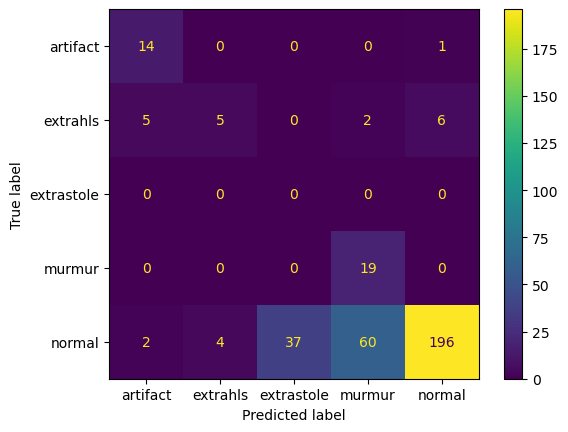

In [47]:
cm_cnn=confusion_matrix(Model.predict(x_test_cnn).argmax(axis=1),y_test_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels = label_names)
disp.plot()
plt.show()

In [48]:
label_names_bin = ['normal','abnormal']

11/11 [==============================] - 0s 7ms/step


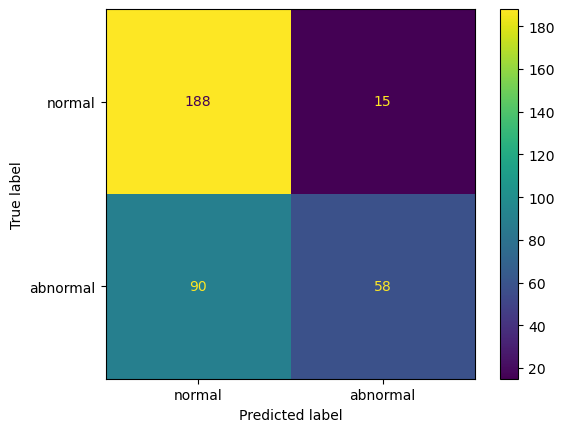

In [49]:
cm_cnn_bin = bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [50]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 5ms/step


0.7008547008547008

In [51]:
bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 5ms/step


(0.7945205479452054, 0.3918918918918919, 0.5248868778280543)

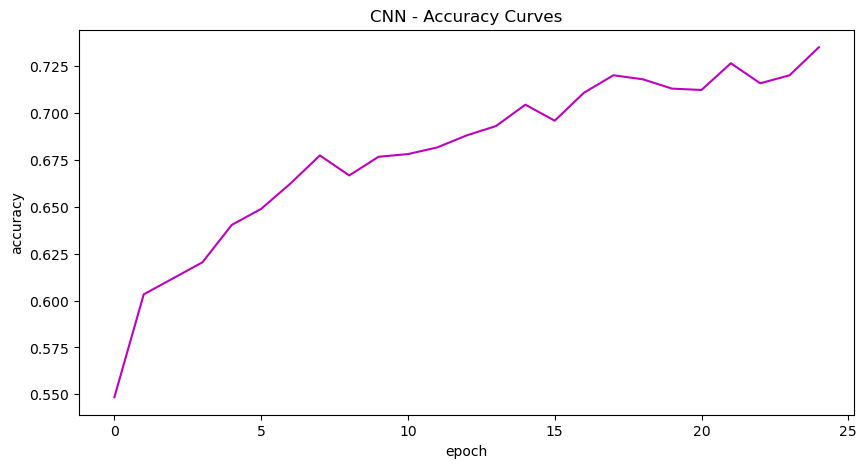

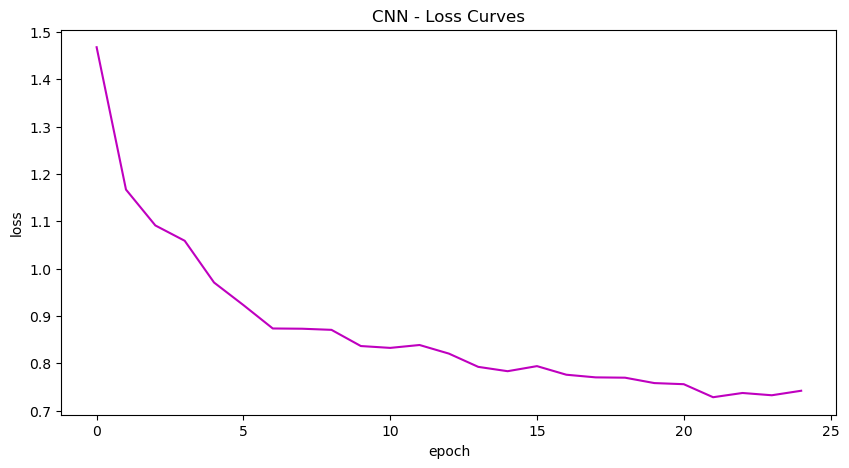

In [52]:
accuracy = Conv1D_Model.history['accuracy']
loss = Conv1D_Model.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## CNN1D Experiment

In [53]:
Model_2 = Sequential()

#Model_2.add(Conv1D(256,5,strides=1,padding="causal",activation="tanh",input_shape=input_shape_dim))
Model_2.add(Conv1D(256,5,strides=1,padding="causal",activation = 'tanh',input_shape=input_shape_dim))
Model_2.add(BatchNormalization())
Model_2.add(MaxPooling1D(3,strides=2,padding="same"))

Model_2.add(Dense(64, activation='tanh'))

Model_2.add(Flatten())
Model_2.add(Dense(1024, activation='relu'))
Model_2.add(Dropout(0.3))

Model_2.add(Dense(units=output_dim, activation='softmax'))

In [54]:
print(Model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 batch_normalization_1 (Batc  (None, 162, 256)         1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 81, 256)          0         
 1D)                                                             
                                                                 
 dense_2 (Dense)             (None, 81, 64)            16448     
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)             

In [55]:
Model_2.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [56]:
Conv1D_Model_2 = Model_2.fit(x_train_cnn, y_train_cnn,
                         epochs=70,
                                validation_data=(x_test_cnn, y_test_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70


2022-12-07 18:52:33.283974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 2s 24ms/step - loss: 3.6980 - accuracy: 0.5641 - val_loss: 1.6497 - val_accuracy: 0.5983
Epoch 2/70
 1/44 [..............................] - ETA: 0s - loss: 1.1504 - accuracy: 0.6250

2022-12-07 18:52:34.576107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 19ms/step - loss: 0.7711 - accuracy: 0.7187 - val_loss: 0.9172 - val_accuracy: 0.6724
Epoch 3/70
44/44 [==============================] - 1s 24ms/step - loss: 0.7471 - accuracy: 0.7315 - val_loss: 0.7645 - val_accuracy: 0.7151
Epoch 4/70
44/44 [==============================] - 1s 19ms/step - loss: 0.6942 - accuracy: 0.7429 - val_loss: 0.7597 - val_accuracy: 0.7151
Epoch 5/70
44/44 [==============================] - 1s 24ms/step - loss: 0.6658 - accuracy: 0.7514 - val_loss: 0.7319 - val_accuracy: 0.7293
Epoch 6/70
44/44 [==============================] - 1s 19ms/step - loss: 0.6550 - accuracy: 0.7571 - val_loss: 0.7772 - val_accuracy: 0.7094
Epoch 7/70
44/44 [==============================] - 1s 19ms/step - loss: 0.6331 - accuracy: 0.7571 - val_loss: 0.7526 - val_accuracy: 0.7208
Epoch 8/70
44/44 [==============================] - 1s 20ms/step - loss: 0.6271 - accuracy: 0.7571 - val_loss: 0.7874 - val_accuracy: 0.7094
Epoch 9/70
44/44 [======

In [57]:
Model_Results_2 = Model_2.evaluate(x_test_cnn,y_test_cnn)
print("LOSS:  " + "%.4f" % Model_Results_2[0])
print("ACCURACY:  " + "%.4f" % Model_Results_2[1])

11/11 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.7692
LOSS:  0.6675
ACCURACY:  0.7692


In [58]:
indexes_predict = tf.argmax(Model_2.predict(x_test_cnn), axis=1)
indexes_actual = tf.argmax(y_test_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 0s 5ms/step


2022-12-07 18:53:06.450332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 21,   0,   0,   0,   0],
       [  0,   9,   0,   0,   0],
       [  0,   0,   5,   2,  30],
       [  0,   1,   0,  42,  38],
       [  2,   1,   1,   6, 193]], dtype=int32)>

In [59]:
bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))

11/11 [==============================] - 0s 4ms/step


array([[191,  12],
       [ 66,  82]])

11/11 [==============================] - 0s 4ms/step


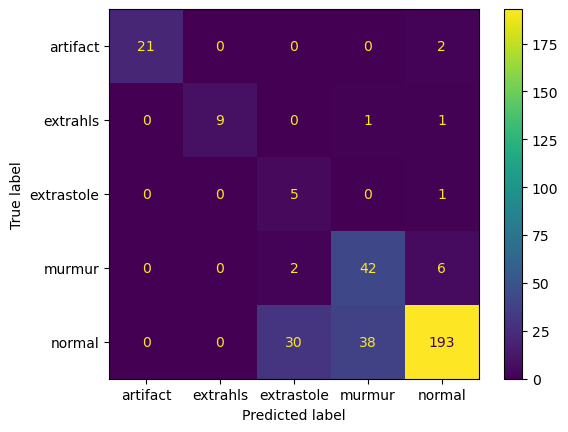

In [60]:
cm_cnn2=confusion_matrix(Model_2.predict(x_test_cnn).argmax(axis=1),y_test_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2, display_labels = label_names)
disp.plot()
plt.show()

11/11 [==============================] - 0s 4ms/step


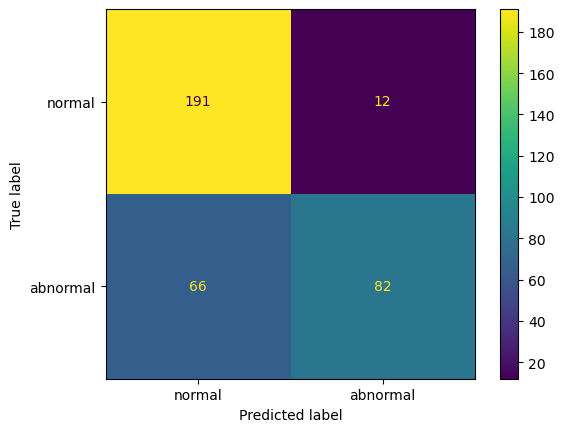

In [61]:
cm_cnn2_bin = bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [62]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 4ms/step


0.7777777777777778

In [63]:
bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 4ms/step


(0.8723404255319149, 0.5540540540540541, 0.6776859504132232)

In [64]:
y_pred_proba_test_CNN2 = bin_prob(Model_2.predict(x_test_cnn))[::,1]
fpr_test_CNN2, tpr_test_CNN2, _ = roc_curve(y_bin_cnn(y_test_cnn),  y_pred_proba_test_CNN2)
roc_auc_test_CNN2 = auc(fpr_test_CNN2, tpr_test_CNN2)
precision_test_CNN2, recall_test_CNN2, thresholds_test_CNN2 = precision_recall_curve(y_bin_cnn(y_test_cnn),y_pred_proba_test_CNN2)

11/11 [==============================] - 0s 4ms/step


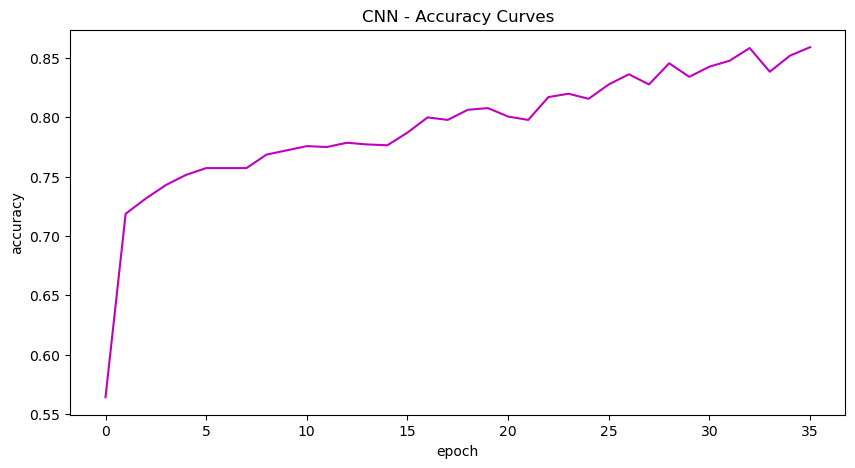

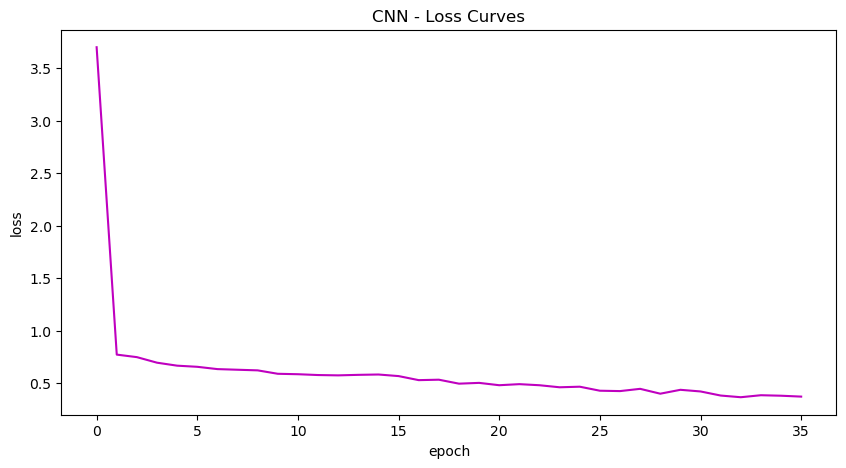

In [65]:
accuracy = Conv1D_Model_2.history['accuracy']
loss = Conv1D_Model_2.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## Rest of the models

In [66]:
y = train_df["category"].values
Label_Encode = LabelEncoder()
y = Label_Encode.fit_transform(y)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [68]:
reference_df = pd.DataFrame()
reference_df['Actual'] = train_df["category"].values
reference_df['Encoded'] = y
reference_df.drop_duplicates()

,Actual,Encoded
0,artifact,0
120,extrahls,1
177,murmur,3
279,normal,4
372,extrastole,2


In [69]:
x_train = Scaler_Function.fit_transform(x_train)
x_test = Scaler_Function.fit_transform(x_test)

In [70]:
print(x_train.shape)
print(x_test.shape)

(1404, 162)
(351, 162)


## RandomForest Classifier

In [71]:
print(x_train.shape)
print(x_test.shape)

(1404, 162)
(351, 162)


In [72]:
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100, 200, 300, 400, 500],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
clf_rfGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_rfGCV = clf_rfGCV.fit(x_train, y_train)
print(clf_rfGCV.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300, 'random_state': 17}


In [73]:
print('Accuracy Score: ',accuracy_score(y_test,clf_rfGCV.predict(x_test)))

Accuracy Score:  0.7150997150997151


In [74]:
print(confusion_matrix(y_test,clf_rfGCV.predict(x_test)))
print(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  0   4   0   0   5]
 [  0   0   0   0  37]
 [  0   1   0  41  39]
 [  4   0   0  14 185]]
[[154  49]
 [ 55  93]]


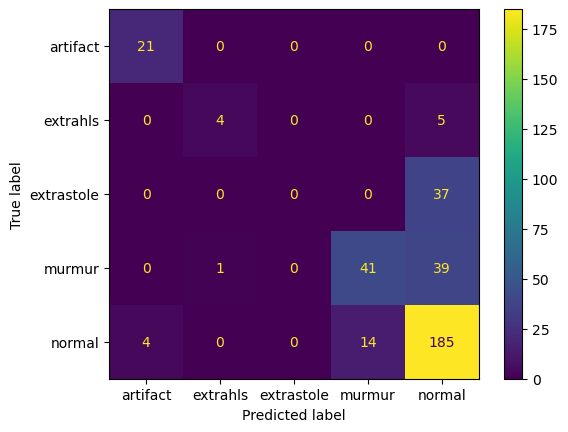

In [75]:
cm_rf=confusion_matrix(y_test,clf_rfGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = label_names)
disp.plot()
plt.show()

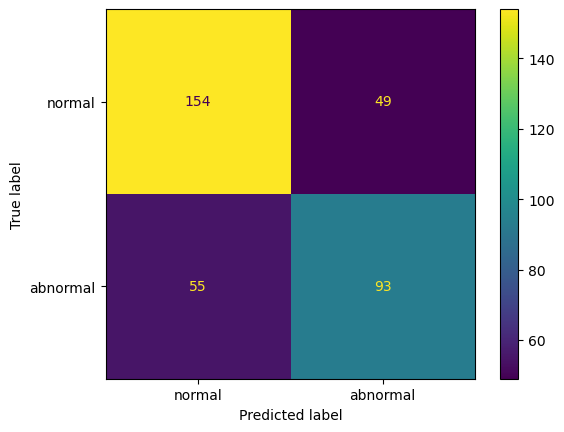

In [76]:
cm_rf_bin=bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [77]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

0.7037037037037037


In [78]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

(0.6549295774647887, 0.6283783783783784, 0.6413793103448276)


In [79]:
y_pred_proba_test_rf = bin_prob(clf_rfGCV.predict_proba(x_test))[::,1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)
precision_test_rf, recall_test_rf, thresholds_test_rf = precision_recall_curve(y_bin(y_test),y_pred_proba_test_rf)

## LGBMBoosting Classifier

In [80]:
clf = LGBMClassifier()

param_grid = {"n_estimators": [100,500,600,700],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
clf_XGBGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_XGBGCV = clf_XGBGCV.fit(x_train, y_train)
print(clf_XGBGCV.best_params_)

filterwarnings("ignore")

{'learning_rate': 0.1, 'n_estimators': 600, 'random_state': 17}


In [81]:
print('Accuracy Score: ',accuracy_score(y_test,clf_XGBGCV.predict(x_test)))

Accuracy Score:  0.7008547008547008


In [82]:
y_pred_proba_test_XGB = bin_prob(clf_XGBGCV.predict_proba(x_test))[::,1]
fpr_test_XGB, tpr_test_XGB, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_XGB)
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)
precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(y_bin(y_test),y_pred_proba_test_XGB)

In [83]:
print(confusion_matrix(y_test,clf_XGBGCV.predict(x_test)))

print(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  4   3   0   1   1]
 [  0   0   9   1  27]
 [  1   0   4  53  23]
 [  6   0  12  25 160]]
[[159  44]
 [ 51  97]]


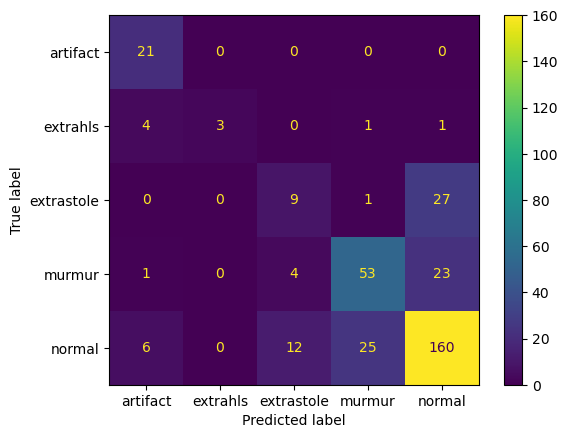

In [84]:
cm_XGB=confusion_matrix(y_test,clf_XGBGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB, display_labels = label_names)
disp.plot()
plt.show()

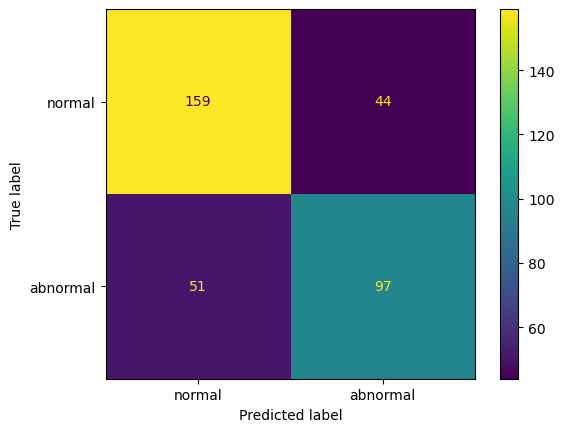

In [85]:
cm_XGB_bin=bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [86]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

0.7293447293447294


In [87]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

(0.6879432624113475, 0.6554054054054054, 0.6712802768166091)


## CatBoost

In [88]:
clf = CatBoostClassifier(verbose=False)

param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [0.05,0.5,1],
        "random_state": [17]
       }

# Grid search
clf_CBGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_CBGCV = clf_CBGCV.fit(x_train, y_train)
print(clf_CBGCV.best_params_)

filterwarnings("ignore")

{'depth': 4, 'l2_leaf_reg': 0.5, 'learning_rate': 0.1, 'random_state': 17}


In [89]:
print('Accuracy Score: ',accuracy_score(y_test,clf_CBGCV.predict(x_test)))
#print('AUC Score: ',roc_auc_score(y_test,clf_CBGCV.best_estimator_.predict_proba(X_test)[:,1]))
#print('F1 Score: ',f1_score(y_test,clf_CBGCV.predict(x_test), average = None))

Accuracy Score:  0.5925925925925926


In [90]:
print(confusion_matrix(y_test,clf_CBGCV.predict(x_test)))

print(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  1   0   0   4   4]
 [  0   0   1  15  21]
 [  0   0   0  62  19]
 [  6   0   3  70 124]]
[[114  89]
 [ 39 109]]


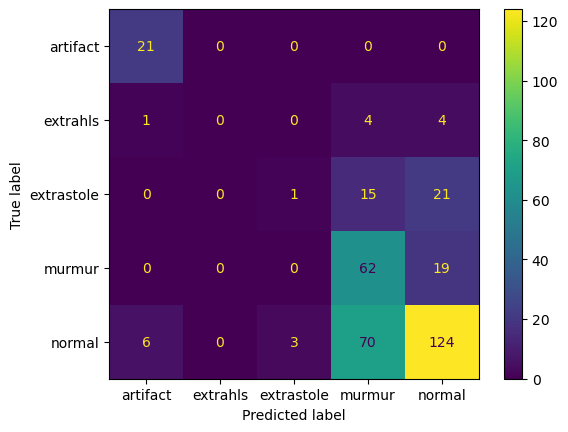

In [91]:
cm_CB=confusion_matrix(y_test,clf_CBGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB, display_labels = label_names)
disp.plot()
plt.show()

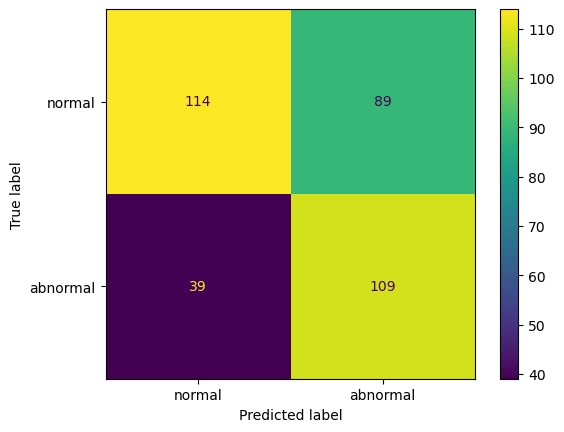

In [92]:
cm_CB_bin=bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [93]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

0.6353276353276354


In [94]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

(0.5505050505050505, 0.7364864864864865, 0.6300578034682082)


In [95]:
y_pred_proba_test_CB = bin_prob(clf_CBGCV.predict_proba(x_test))[::,1]
fpr_test_CB, tpr_test_CB, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_CB)
roc_auc_test_CB = auc(fpr_test_CB, tpr_test_CB)
precision_test_CB, recall_test_CB, thresholds_test_CB = precision_recall_curve(y_bin(y_test),y_pred_proba_test_CB)

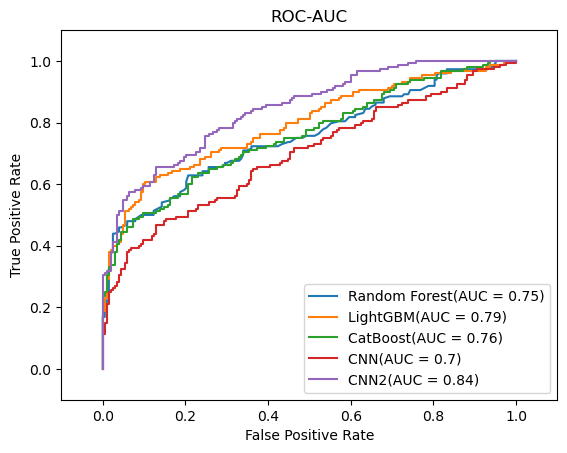

In [96]:
# Plot ROC curves

plt.plot(fpr_test_rf, tpr_test_rf)
plt.plot(fpr_test_XGB, tpr_test_XGB)
plt.plot(fpr_test_CB, tpr_test_CB)
plt.plot(fpr_test_CNN, tpr_test_CNN)
plt.plot(fpr_test_CNN2, tpr_test_CNN2)
plt.legend(['Random Forest(AUC = ' + str(round(roc_auc_test_rf,2))+')'\
            ,'LightGBM(AUC = ' + str(round(roc_auc_test_XGB,2))+')'\
            ,'CatBoost(AUC = ' + str(round(roc_auc_test_CB,2))+')'\
            ,'CNN(AUC = ' + str(round(roc_auc_test_CNN,2))+')'\
            ,'CNN2(AUC = ' + str(round(roc_auc_test_CNN2,2))+')'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

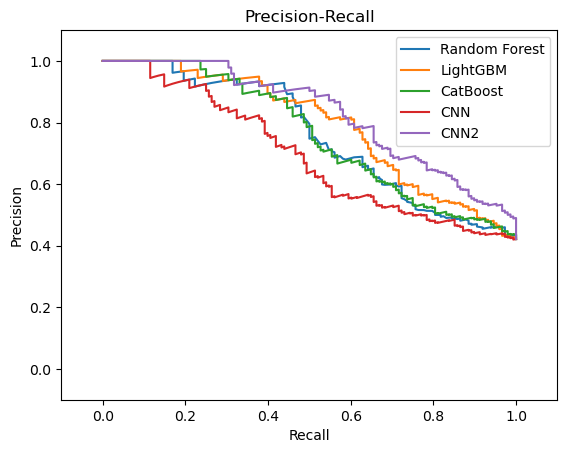

In [97]:
plt.plot(recall_test_rf, precision_test_rf)
plt.plot(recall_test_XGB, precision_test_XGB)
plt.plot(recall_test_CB, precision_test_CB)
plt.plot(recall_test_CNN, precision_test_CNN)
plt.plot(recall_test_CNN2, precision_test_CNN2)
plt.legend(['Random Forest', 'LightGBM','CatBoost','CNN','CNN2'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

## Treating Class Imbalance

In [99]:
training_df = train_df.sample(frac = 0.8)
testing_df = train_df.drop(training_df.index)

print(training_df.shape)
print(testing_df.shape)

(1404, 163)
(351, 163)


In [133]:
# handling class imbalance by declaring majority and minority classes

train_df_majority = training_df[training_df.label=="normal"]
train_df_murmur = training_df[training_df.label=="murmur"]
train_df_extrastole = training_df[training_df.label=="extrastole"]
train_df_extrahls = training_df[training_df.label=="extrahls"]
train_df_artifact = training_df[training_df.label=="artifact"]

In [137]:
majority_number = len(train_df_majority)

# upsample the minority classes
df_minority1_upsampled = resample(train_df_murmur, 
                                 replace=True,     
                                 n_samples=majority_number,    
                                 random_state=42) 

df_minority2_upsampled = resample(train_df_extrastole, 
                                 replace=True,     
                                 n_samples=majority_number,    
                                 random_state=42) 

df_minority3_upsampled = resample(train_df_extrahls, 
                                 replace=True,     
                                 n_samples=majority_number,    
                                 random_state=42)

df_minority4_upsampled = resample(train_df_artifact, 
                                 replace=True,     
                                 n_samples=majority_number,    
                                 random_state=42)

In [138]:
# combine majority class with the upsampled minority classes

df_upsampled = pd.concat([train_df_majority, 
                          df_minority1_upsampled, 
                          df_minority2_upsampled,
                          df_minority3_upsampled,
                        df_minority4_upsampled], 
                         ignore_index=False)

In [101]:
df_upsampled.category.value_counts()

normal        842
murmur        842
extrahls      842
artifact      842
extrastole    842
Name: category, dtype: int64

In [102]:
training_df.category.value_counts()

normal        842
murmur        305
extrastole    111
artifact       96
extrahls       50
Name: category, dtype: int64

<AxesSubplot:ylabel='audio_duration'>

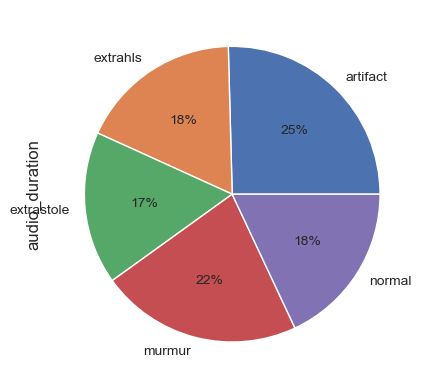

In [142]:
#class distribution after upsampling is done

df_upsampled.groupby('label')["audio_duration"].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})

In [103]:
#### Transforming and Encoding for CNN again using One Hot Encoding

Encoder_Function = OneHotEncoder()
Scaler_Function = MinMaxScaler()

x_train_re = df_upsampled.iloc[:,:-1].values
y_train_re = df_upsampled["category"].values

x_test_re = testing_df.iloc[:,:-1].values
y_test_re = testing_df["category"].values

print(x_train_re.shape)
print(y_train_re.shape)
print(x_test_re.shape)
print(y_test_re.shape)

(4210, 162)
(4210,)
(351, 162)
(351,)


## Implementing all models again after treating class imbalance

## Transforming and Encoding for CNN again using One Hot Encoding

In [104]:
y_train_re_cnn = Encoder_Function.fit_transform(np.array(y_train_re).reshape(-1,1)).toarray()
y_test_re_cnn = Encoder_Function.transform(np.array(y_test_re).reshape(-1,1)).toarray()

In [105]:
x_train_re_cnn = np.expand_dims(x_train_re,axis=2)
x_test_re_cnn = np.expand_dims(x_test_re,axis=2)

In [106]:
print(x_train_re_cnn.shape)
print(y_train_re_cnn.shape)
print(x_test_re_cnn.shape)
print(y_test_re_cnn.shape)

(4210, 162, 1)
(4210, 5)
(351, 162, 1)
(351, 5)


In [107]:
cnnreference_df_re = pd.DataFrame()
cnnreference_df_re['Actual'] = df_upsampled["category"].values
cnnreference_df_re['Encoded'] = [''.join(str(y_train_re_cnn[i,:].tolist())) for i in range(y_train_re_cnn.shape[0])]
cnnreference_df_re.drop_duplicates()

,Actual,Encoded
0,normal,"[0.0, 0.0, 0.0, 0.0, 1.0]"
842,murmur,"[0.0, 0.0, 0.0, 1.0, 0.0]"
1684,extrahls,"[0.0, 1.0, 0.0, 0.0, 0.0]"
2526,artifact,"[1.0, 0.0, 0.0, 0.0, 0.0]"
3368,extrastole,"[0.0, 0.0, 1.0, 0.0, 0.0]"


In [108]:
output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (x_train_re_cnn.shape[1],1)

In [109]:
input_shape_dim

(162, 1)

## CNN CONV1D

In [110]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [111]:
Model = Sequential()

Model.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=input_shape_dim))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(256,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(128,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Conv1D(64,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(32,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Flatten())
Model.add(Dense(1024, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=output_dim, activation='softmax'))

In [112]:
print(Model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 batch_normalization_2 (Batc  (None, 162, 256)         1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 81, 256)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 81, 256)           262400    
                                                                 
 dropout_6 (Dropout)         (None, 81, 256)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 41, 256)         

In [113]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [114]:
Conv1D_Model = Model.fit(x_train_re_cnn, y_train_re_cnn,
                         epochs=70,
                                validation_data=(x_test_re_cnn, y_test_re_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70


2022-12-07 19:17:43.107994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - ETA: 0s - loss: 1.3541 - accuracy: 0.3960

2022-12-07 19:17:45.961743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


132/132 [==============================] - 3s 22ms/step - loss: 1.3541 - accuracy: 0.3960 - val_loss: 1.2529 - val_accuracy: 0.2051
Epoch 2/70
132/132 [==============================] - 2s 18ms/step - loss: 0.9151 - accuracy: 0.5727 - val_loss: 1.1284 - val_accuracy: 0.5442
Epoch 3/70
132/132 [==============================] - 2s 18ms/step - loss: 0.7665 - accuracy: 0.6382 - val_loss: 1.0931 - val_accuracy: 0.5356
Epoch 4/70
132/132 [==============================] - 2s 18ms/step - loss: 0.7206 - accuracy: 0.6829 - val_loss: 1.1581 - val_accuracy: 0.3048
Epoch 5/70
132/132 [==============================] - 2s 18ms/step - loss: 0.7316 - accuracy: 0.6651 - val_loss: 1.1660 - val_accuracy: 0.2422
Epoch 6/70
132/132 [==============================] - 2s 18ms/step - loss: 0.6701 - accuracy: 0.6865 - val_loss: 0.9979 - val_accuracy: 0.6781
Epoch 7/70
132/132 [==============================] - 2s 18ms/step - loss: 0.6476 - accuracy: 0.6995 - val_loss: 1.0643 - val_accuracy: 0.3362
Epoch 8/70

In [115]:
Model_Results = Model.evaluate(x_test_re_cnn,y_test_re_cnn)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

11/11 [==============================] - 0s 7ms/step - loss: 0.9929 - accuracy: 0.4217
LOSS:  0.9929
ACCURACY:  0.4217


In [116]:
indexes_predict = tf.argmax(Model.predict(x_test_re_cnn), axis=1)
indexes_actual = tf.argmax(y_test_re_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 0s 7ms/step


2022-12-07 19:18:36.412131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 21,   0,   0,   3,   0],
       [  0,   7,   0,   0,   0],
       [  0,   0,  18,   1,   8],
       [  0,   4,  22,  44,  12],
       [  3,   9, 122,  19,  58]], dtype=int32)>

In [117]:
bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))

11/11 [==============================] - 0s 5ms/step


array([[  0, 211],
       [  0, 140]])

11/11 [==============================] - 0s 5ms/step


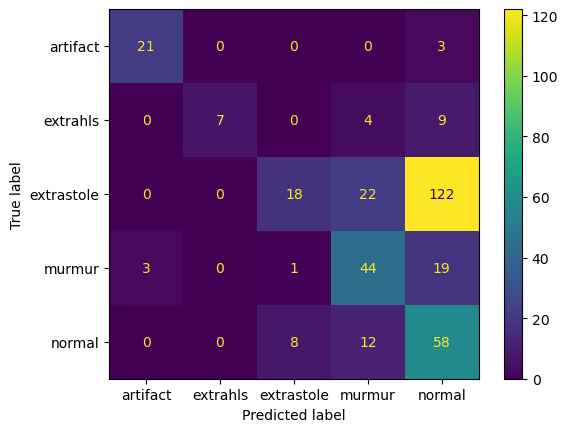

In [118]:
cm_cnn_re=confusion_matrix(Model.predict(x_test_re_cnn).argmax(axis=1),y_test_re_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_re, display_labels = label_names)
disp.plot()
plt.show()

11/11 [==============================] - 0s 5ms/step


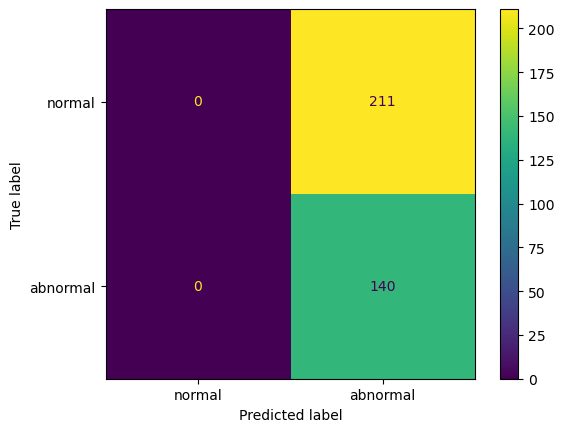

In [119]:
cm_cnn_re_bin = bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_re_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [120]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 5ms/step


0.39886039886039887

In [121]:
bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 5ms/step


(0.39886039886039887, 1.0, 0.570264765784114)

In [122]:
y_pred_proba_test_re_CNN = bin_prob(Model.predict(x_test_re_cnn))[::,1]
fpr_test_re_CNN, tpr_test_re_CNN, _ = roc_curve(y_bin_cnn(y_test_re_cnn),  y_pred_proba_test_re_CNN)
roc_auc_test_re_CNN = auc(fpr_test_re_CNN, tpr_test_re_CNN)
precision_test_re_CNN, recall_test_re_CNN, thresholds_test_re_CNN = precision_recall_curve(y_bin_cnn(y_test_re_cnn),y_pred_proba_test_re_CNN)

11/11 [==============================] - 0s 5ms/step


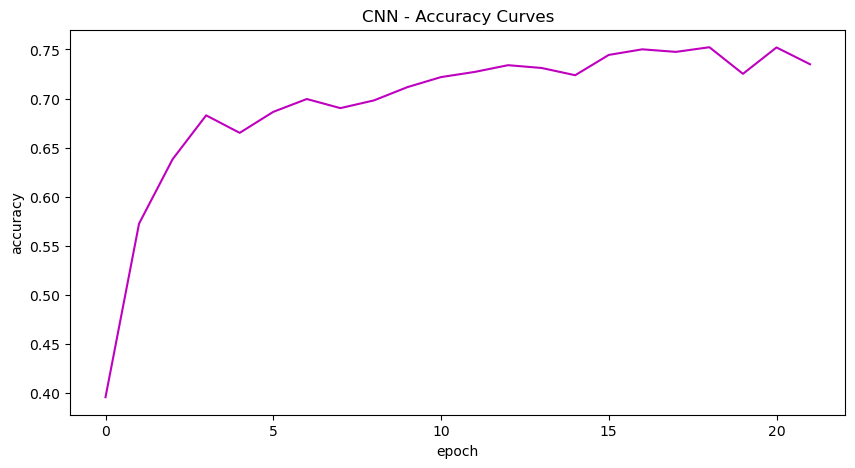

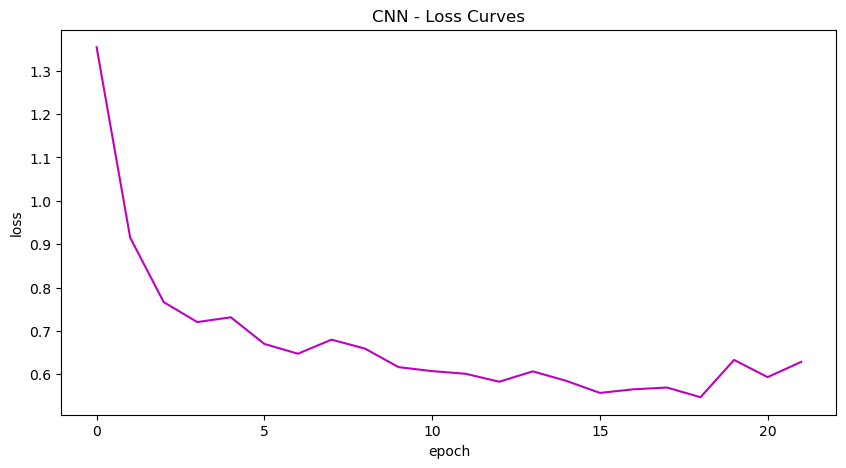

In [123]:
accuracy = Conv1D_Model.history['accuracy']
loss = Conv1D_Model.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## CNN 1D Experiment

In [124]:
Conv1D_Model_2 = Model_2.fit(x_train_re_cnn, y_train_re_cnn,
                         epochs=70,
                                validation_data=(x_test_re_cnn, y_test_re_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
132/132 [==============================] - 3s 21ms/step - loss: 0.3726 - accuracy: 0.8489 - val_loss: 0.6020 - val_accuracy: 0.7265
Epoch 2/70
132/132 [==============================] - 3s 20ms/step - loss: 0.3323 - accuracy: 0.8651 - val_loss: 0.5132 - val_accuracy: 0.7949
Epoch 3/70
132/132 [==============================] - 2s 18ms/step - loss: 0.3021 - accuracy: 0.8760 - val_loss: 0.6635 - val_accuracy: 0.7236
Epoch 4/70
132/132 [==============================] - 3s 20ms/step - loss: 0.2875 - accuracy: 0.8860 - val_loss: 0.4928 - val_accuracy: 0.8006
Epoch 5/70
132/132 [==============================] - 2s 18ms/step - loss: 0.2649 - accuracy: 0.8969 - val_loss: 0.5316 - val_accuracy: 0.7550
Epoch 6/70
132/132 [==============================] - 3s 20ms/step - loss: 0.2395 - accuracy: 0.9074 - val_loss: 0.4539 - val_accuracy: 0.8034
Epoch 7/70
132/132 [==============================] - 2s 18ms/step - loss: 0.2241 - accuracy: 0.9171 - val_loss: 0.4570 - val_accuracy: 0.7920

In [125]:
Model_Results_2 = Model_2.evaluate(x_test_re_cnn,y_test_re_cnn)
print("LOSS:  " + "%.4f" % Model_Results_2[0])
print("ACCURACY:  " + "%.4f" % Model_Results_2[1])

11/11 [==============================] - 0s 8ms/step - loss: 0.5132 - accuracy: 0.7949
LOSS:  0.5132
ACCURACY:  0.7949


In [126]:
indexes_predict = tf.argmax(Model_2.predict(x_test_re_cnn), axis=1)
indexes_actual = tf.argmax(y_test_re_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 24,   0,   0,   0,   0],
       [  0,   6,   0,   1,   0],
       [  0,   0,  13,   2,  12],
       [  0,   1,   4,  53,  24],
       [  0,   1,  16,  11, 183]], dtype=int32)>

In [127]:
bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))

11/11 [==============================] - 0s 4ms/step


array([[183,  28],
       [ 35, 105]])

11/11 [==============================] - 0s 4ms/step


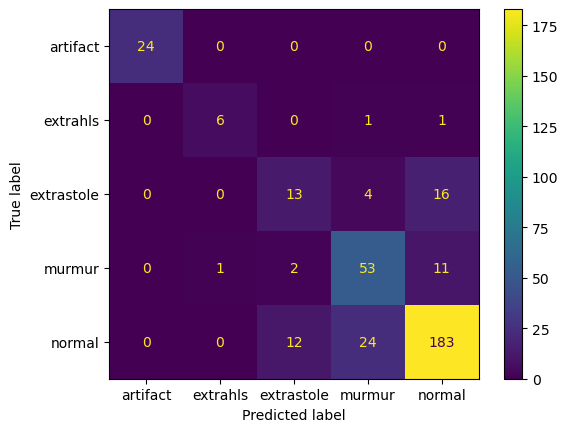

In [128]:
cm_cnn2_re=confusion_matrix(Model_2.predict(x_test_re_cnn).argmax(axis=1),y_test_re_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_re, display_labels = label_names)
disp.plot()
plt.show()

11/11 [==============================] - 0s 4ms/step


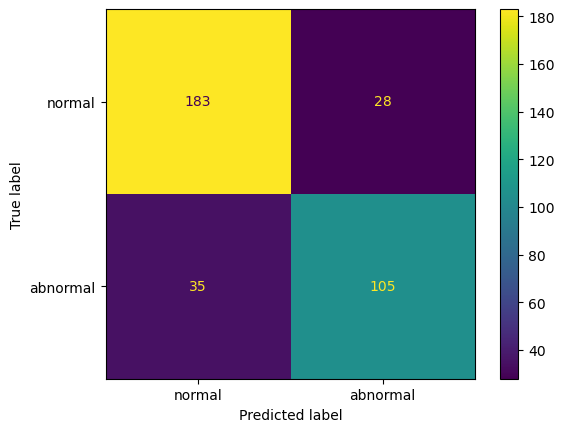

In [129]:
cm_cnn2_re_bin = bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_re_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [130]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 4ms/step


0.8205128205128205

In [131]:
bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 4ms/step


(0.7894736842105263, 0.75, 0.7692307692307692)

In [132]:
y_pred_proba_test_re_CNN2 = bin_prob(Model_2.predict(x_test_re_cnn))[::,1]
fpr_test_re_CNN2, tpr_test_re_CNN2, _ = roc_curve(y_bin_cnn(y_test_re_cnn),  y_pred_proba_test_re_CNN2)
roc_auc_test_re_CNN2 = auc(fpr_test_re_CNN2, tpr_test_re_CNN2)
precision_test_re_CNN2, recall_test_re_CNN2, thresholds_test_re_CNN2 = precision_recall_curve(y_bin_cnn(y_test_re_cnn),y_pred_proba_test_re_CNN2)

11/11 [==============================] - 0s 4ms/step


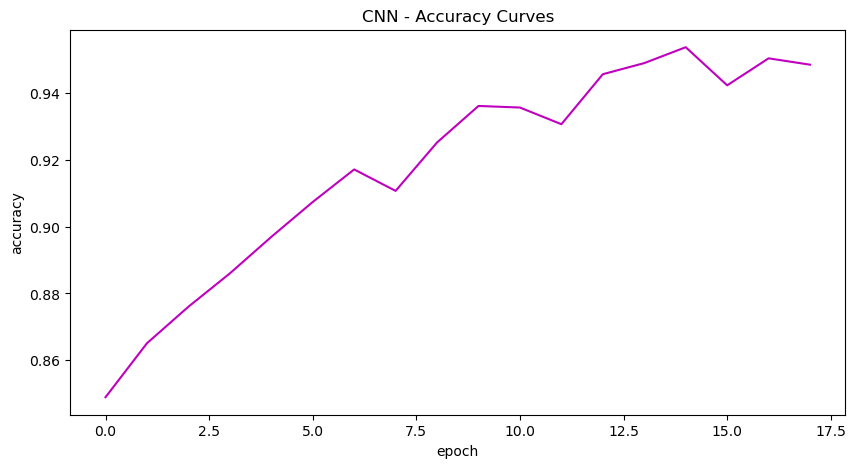

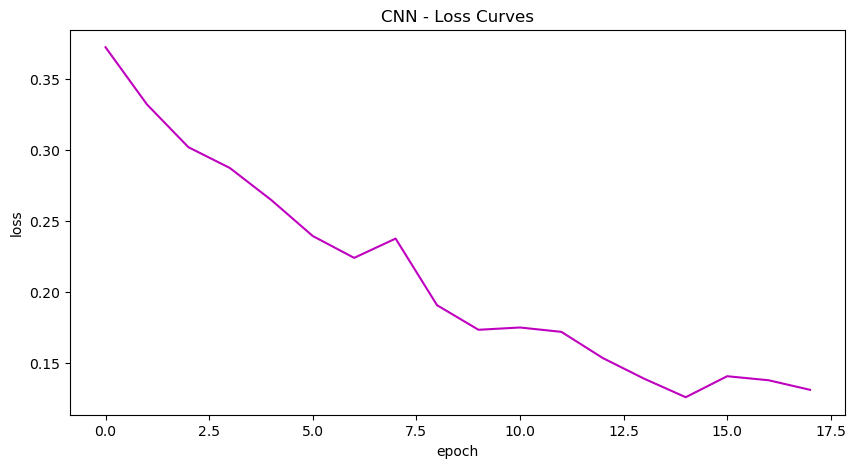

In [133]:
accuracy = Conv1D_Model_2.history['accuracy']
loss = Conv1D_Model_2.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## Rest of the Models

In [134]:
print(x_train_re.shape)
print(x_test_re.shape)
print(y_train_re.shape)
print(y_test_re.shape)

(4210, 162)
(351, 162)
(4210,)
(351,)


In [135]:
y_train_re = Label_Encode.fit_transform(y_train_re)
y_test_re = Label_Encode.transform(y_test_re)

In [136]:
reference_df_re = pd.DataFrame()
reference_df_re['Actual'] = df_upsampled["category"].values
reference_df_re['Encoded'] = y_train_re
reference_df_re.drop_duplicates()

,Actual,Encoded
0,normal,4
842,murmur,3
1684,extrahls,1
2526,artifact,0
3368,extrastole,2


## RandomForest Classifier

In [137]:
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100, 200, 300, 400, 500],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
clf_rfGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_rfGCV_re = clf_rfGCV_re.fit(x_train_re, y_train_re)
print(clf_rfGCV_re.best_params_)

{'criterion': 'entropy', 'max_features': 10, 'n_estimators': 400, 'random_state': 17}


In [138]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_rfGCV_re.predict(x_test_re)))

Accuracy Score:  0.7606837606837606


In [139]:
print(confusion_matrix(y_test_re,clf_rfGCV_re.predict(x_test_re)))
print(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

[[ 22   0   0   0   2]
 [  0   5   0   0   2]
 [  0   0   1   0  26]
 [  0   2   0  41  39]
 [  1   3   1   8 198]]
[[190  21]
 [ 55  85]]


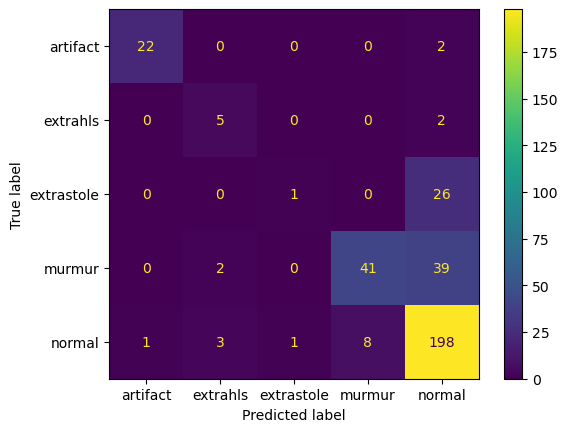

In [140]:
cm_rf_re=confusion_matrix(y_test_re,clf_rfGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_re, display_labels = label_names)
disp.plot()
plt.show()

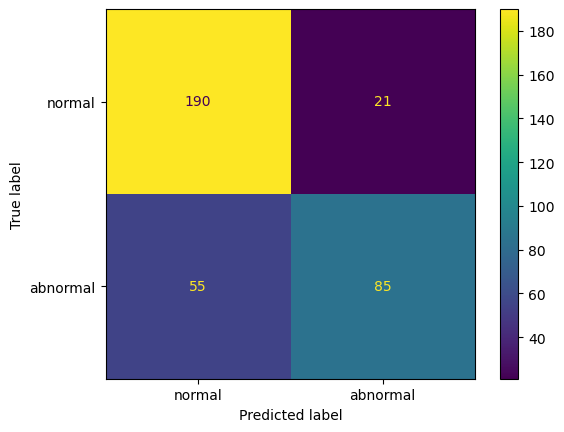

In [141]:
cm_rf_bin_re=bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [142]:
bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

0.7834757834757835

In [143]:
bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

(0.8018867924528302, 0.6071428571428571, 0.6910569105691057)

In [144]:
y_pred_proba_test_re_rf = bin_prob(clf_rfGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_rf, tpr_test_re_rf, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_rf)
roc_auc_test_re_rf = auc(fpr_test_re_rf, tpr_test_re_rf)
precision_test_re_rf, recall_test_re_rf, thresholds_test_re_rf = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_rf)

## LGBM Classifier

In [145]:
clf = LGBMClassifier()

param_grid = {"n_estimators": [100,500,600,700],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
clf_XGBGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_XGBGCV_re = clf_XGBGCV_re.fit(x_train_re, y_train_re)
print(clf_XGBGCV_re.best_params_)

filterwarnings("ignore")

{'learning_rate': 0.5, 'n_estimators': 100, 'random_state': 17}


In [146]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_XGBGCV_re.predict(x_test_re)))

Accuracy Score:  0.8205128205128205


In [147]:
y_pred_proba_test_re_XGB = bin_prob(clf_XGBGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_XGB, tpr_test_re_XGB, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_XGB)
roc_auc_test_re_XGB = auc(fpr_test_re_XGB, tpr_test_re_XGB)
precision_test_re_XGB, recall_test_re_XGB, thresholds_test_re_XGB = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_XGB)

In [148]:
print(confusion_matrix(y_test_re,clf_XGBGCV_re.predict(x_test_re)))

print(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

[[ 24   0   0   0   0]
 [  0   4   0   0   3]
 [  0   0   7   2  18]
 [  0   1   1  51  29]
 [  0   1   1   7 202]]
[[202   9]
 [ 50  90]]


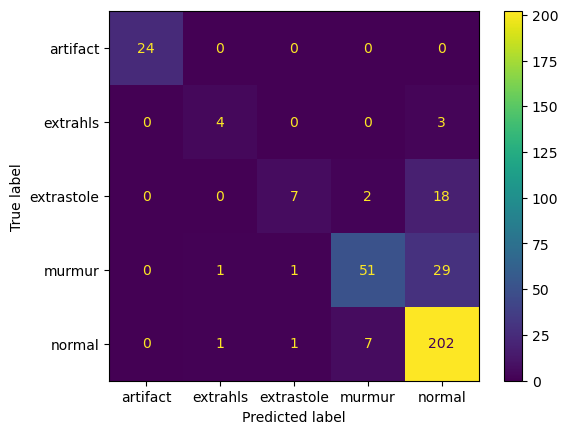

In [149]:
cm_rf_XGB=confusion_matrix(y_test_re,clf_XGBGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_XGB, display_labels = label_names)
disp.plot()
plt.show()

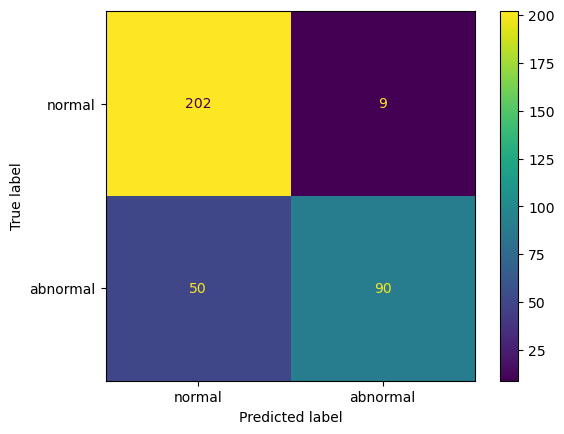

In [150]:
cm_XGB_bin_re=bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [151]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

0.8319088319088319


In [152]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

(0.9090909090909091, 0.6428571428571429, 0.7531380753138075)


## CatBoost

In [153]:
clf = CatBoostClassifier(verbose=False)

param_grid = {'learning_rate': [0.03, 0.1, 0.5],
        'depth': [4, 6],
        'l2_leaf_reg': [0.05,0.5,1],
        "random_state": [17]
       }

# Grid search
clf_CBGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_CBGCV = clf_CBGCV_re.fit(x_train, y_train)
print(clf_CBGCV_re.best_params_)

filterwarnings("ignore")

{'depth': 4, 'l2_leaf_reg': 0.05, 'learning_rate': 0.5, 'random_state': 17}


In [154]:
y_pred_proba_test_re_CB = bin_prob(clf_CBGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_CB, tpr_test_re_CB, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_CB)
roc_auc_test_re_CB = auc(fpr_test_re_CB, tpr_test_re_CB)
precision_test_re_CB, recall_test_re_CB, thresholds_test_re_CB = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_CB)

In [155]:
print(confusion_matrix(y_test_re,clf_CBGCV_re.predict(x_test_re)))

print(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

[[ 17   0   0   7   0]
 [  0   0   0   7   0]
 [  0   0   0  27   0]
 [  0   0   0  82   0]
 [  0   0   0 205   6]]
[[  6 205]
 [  0 140]]


In [156]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_CBGCV_re.predict(x_test_re)))

Accuracy Score:  0.29914529914529914


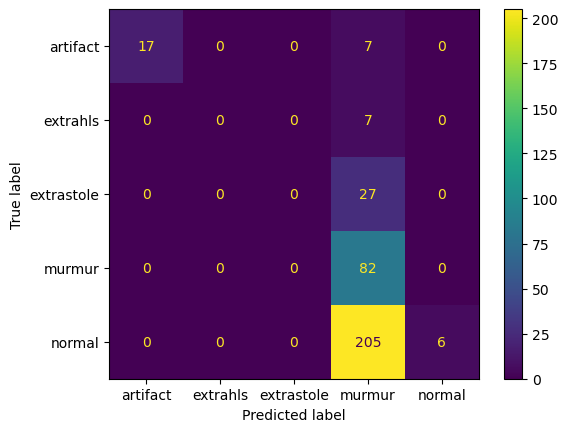

In [157]:
cm_rf_CB=confusion_matrix(y_test_re,clf_CBGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_CB, display_labels = label_names)
disp.plot()
plt.show()

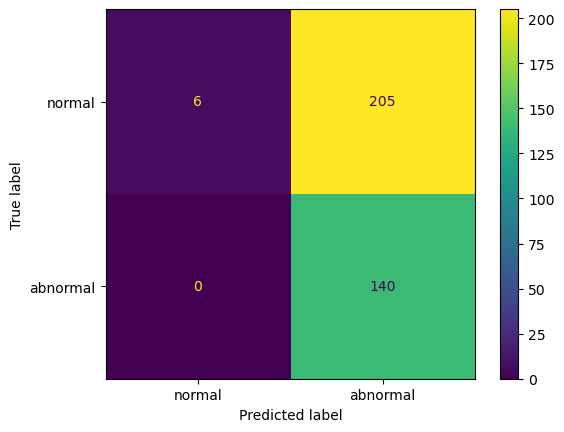

In [158]:
cm_CB_bin_re=bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [159]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

0.41595441595441596


In [160]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

(0.4057971014492754, 1.0, 0.577319587628866)


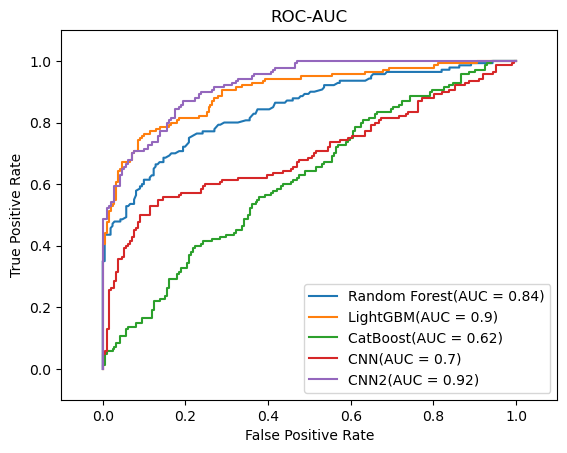

In [163]:
# Plot ROC curves

plt.plot(fpr_test_re_rf, tpr_test_re_rf)
plt.plot(fpr_test_re_XGB, tpr_test_re_XGB)
plt.plot(fpr_test_re_CB, tpr_test_re_CB)
plt.plot(fpr_test_re_CNN, tpr_test_re_CNN)
plt.plot(fpr_test_re_CNN2, tpr_test_re_CNN2)
plt.legend(['Random Forest(AUC = ' + str(round(roc_auc_test_re_rf,2))+')'\
            ,'LightGBM(AUC = ' + str(round(roc_auc_test_re_XGB,2))+')'\
            ,'CatBoost(AUC = ' + str(round(roc_auc_test_re_CB,2))+')'\
            ,'CNN(AUC = ' + str(round(roc_auc_test_re_CNN,2))+')'\
            ,'CNN2(AUC = ' + str(round(roc_auc_test_re_CNN2,2))+')'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

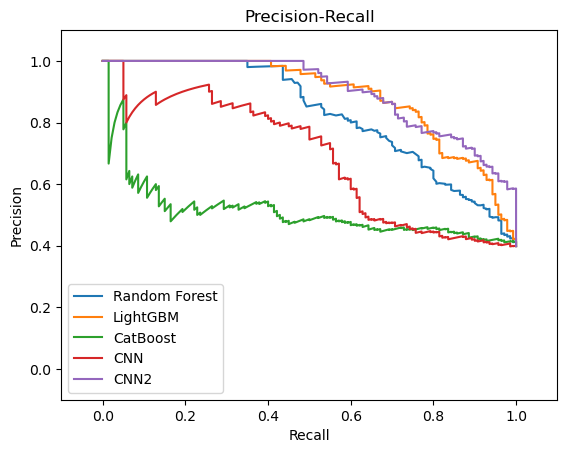

In [164]:
plt.plot(recall_test_re_rf, precision_test_re_rf)
plt.plot(recall_test_re_XGB, precision_test_re_XGB)
plt.plot(recall_test_re_CB, precision_test_re_CB)
plt.plot(recall_test_re_CNN, precision_test_re_CNN)
plt.plot(recall_test_re_CNN2, precision_test_re_CNN2)
plt.legend(['Random Forest', 'LightGBM','CatBoost','CNN','CNN2'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()